## Practical Work 3

For this practical work, the trainees will have to develop a Python program that is able to implement the accelerated gradient descent methods <b>(Momentum and NAG)</b> in order to achieve the linear regression of a set of datapoints.

##### Please notice that we will apply these algorithm to single variable LR.
##### Only batch variant is required.

#### Import numpy, matplotlib.pyplot and make it inline

In [1]:
import numpy as np
import matplotlib.pyplot as plt 


To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -1, b = 2)</b>


In [39]:
X = np.linspace(0,20)
X

array([ 0.        ,  0.40816327,  0.81632653,  1.2244898 ,  1.63265306,
        2.04081633,  2.44897959,  2.85714286,  3.26530612,  3.67346939,
        4.08163265,  4.48979592,  4.89795918,  5.30612245,  5.71428571,
        6.12244898,  6.53061224,  6.93877551,  7.34693878,  7.75510204,
        8.16326531,  8.57142857,  8.97959184,  9.3877551 ,  9.79591837,
       10.20408163, 10.6122449 , 11.02040816, 11.42857143, 11.83673469,
       12.24489796, 12.65306122, 13.06122449, 13.46938776, 13.87755102,
       14.28571429, 14.69387755, 15.10204082, 15.51020408, 15.91836735,
       16.32653061, 16.73469388, 17.14285714, 17.55102041, 17.95918367,
       18.36734694, 18.7755102 , 19.18367347, 19.59183673, 20.        ])

In [40]:
a=-1
b=2
y=a*X+b
y

array([  2.        ,   1.59183673,   1.18367347,   0.7755102 ,
         0.36734694,  -0.04081633,  -0.44897959,  -0.85714286,
        -1.26530612,  -1.67346939,  -2.08163265,  -2.48979592,
        -2.89795918,  -3.30612245,  -3.71428571,  -4.12244898,
        -4.53061224,  -4.93877551,  -5.34693878,  -5.75510204,
        -6.16326531,  -6.57142857,  -6.97959184,  -7.3877551 ,
        -7.79591837,  -8.20408163,  -8.6122449 ,  -9.02040816,
        -9.42857143,  -9.83673469, -10.24489796, -10.65306122,
       -11.06122449, -11.46938776, -11.87755102, -12.28571429,
       -12.69387755, -13.10204082, -13.51020408, -13.91836735,
       -14.32653061, -14.73469388, -15.14285714, -15.55102041,
       -15.95918367, -16.36734694, -16.7755102 , -17.18367347,
       -17.59183673, -18.        ])

### Plot X vs. y

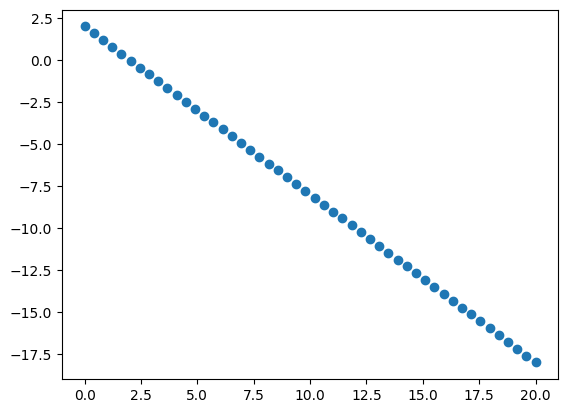

In [4]:
plt.scatter(X,y)

#### Use your final version of the implemented Batch GD algorithm for single variable to find the best line filt of the given data.
#### Choose the suitable number of iterations, learning rate, and stop criteria.
#### Calculate r2 score. Shouldn't below 0.9
#### Plot the required curves (loss-epochs, loss-theta0, loss-theta1, all fitted lines per epoch (single graph), best fit line)

In [35]:
def batch_gd_single_var(X, y, LR=0.01, TOL=1E-6, MAX_ITER=1000):
    m = len(X)
    
    # Initialize
    theta_0 = 0.0
    theta_1 = 0.0
    
    loss_history = []
    theta0_history = [theta_0]
    theta1_history = [theta_1]
    
    for iter in range(MAX_ITER):
        # Predict
        h_x = theta_0 + theta_1 * X
        
        # Loss
        error = h_x - y
        j = np.sum(error**2) / (2 * m)
        loss_history.append(j)
        
        # Grad
        grad_theta_0 = (1/m) * np.sum(error)
        grad_theta_1 = (1/m) * np.sum(error * X)
        
        # Update
        theta_0 -= LR * grad_theta_0
        theta_1 -= LR * grad_theta_1
        
        # History AFTER update
        theta0_history.append(theta_0)
        theta1_history.append(theta_1)
        
        # Convergence check
        if iter > 0 and np.abs(loss_history[-1] - loss_history[-2]) < TOL:
            print(f'Converged at iteration {iter}')
            break
    
    return theta_0, theta_1, loss_history, theta0_history, theta1_history

In [53]:
def plot_loss_vs_epochs(loss_history, title="Loss vs Epochs"):
    """Plot loss vs epochs"""
    plt.figure(figsize=(10, 6))
    plt.plot(loss_history, marker = 'o', linewidth=2)
    plt.xlabel('Epochs')
    plt.ylabel('Loss (MSE)')
    plt.title(title)
    plt.grid(True, alpha=0.3)
    plt.show()

def plot_theta_vs_loss(theta_0_hist, theta_1_hist, loss_hist):
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    axes[0].plot(theta_0_hist, loss_hist , marker = 'o' )
    axes[0].set_xlabel('Theta_0')
    axes[0].set_ylabel('Loss')
    axes[0].set_title('Loss vs Theta_0')
    axes[0].grid(True)
    
    axes[1].plot(theta_1_hist, loss_hist, marker = 'o')
    axes[1].set_xlabel('Theta_1')
    axes[1].set_ylabel('Loss')
    axes[1].set_title('Loss vs Theta_1')
    axes[1].grid(True)
    
    plt.tight_layout()
    plt.show()

def plot_loss_surface(theta0_history, theta1_history, X, y, title="Loss Surface with Gradient Descent Path"):
    """Plot loss surface with parameter trajectory"""
    # Create mesh
    theta0_range = np.linspace(min(theta0_history)-1, max(theta0_history)+1, 50)
    theta1_range = np.linspace(min(theta1_history)-1, max(theta1_history)+1, 50)
    T0, T1 = np.meshgrid(theta0_range, theta1_range)
    
    # Calculate loss for each point
    m = len(X)
    Z = np.zeros_like(T0)
    for i in range(len(theta0_range)):
        for j in range(len(theta1_range)):
            h = T0[j,i] + T1[j,i] * X
            Z[j,i] = (1/(2*m)) * np.sum((h - y)**2)
    
    # Plot
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    
    # Contour plot
    contour = ax1.contour(T0, T1, Z, levels=20, cmap='viridis')
    ax1.plot(theta0_history, theta1_history, 'r.-', linewidth=2, markersize=3)
    ax1.plot(theta0_history[0], theta1_history[0], 'go', markersize=10, label='Start')
    ax1.plot(theta0_history[-1], theta1_history[-1], 'r*', markersize=15, label='End')
    ax1.set_xlabel('θ₀')
    ax1.set_ylabel('θ₁')
    ax1.set_title('Loss Contour (θ₀ vs θ₁)')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    plt.colorbar(contour, ax=ax1)
    
    # 3D surface
    from mpl_toolkits.mplot3d import Axes3D
    ax2 = fig.add_subplot(122, projection='3d')
    ax2.plot_surface(T0, T1, Z, alpha=0.6, cmap='viridis')
    ax2.plot(theta0_history, theta1_history, [np.interp(theta0_history[i], theta0_range, 
             [((theta0_history[i] + theta1_history[i] * X - y)**2).mean()/2 for _ in range(1)])[0] 
             for i in range(len(theta0_history))], 'r.-', linewidth=2, markersize=3)
    ax2.set_xlabel('θ₀')
    ax2.set_ylabel('θ₁')
    ax2.set_zlabel('Loss')
    ax2.set_title('3D Loss Surface')
    
    plt.tight_layout()
    plt.show()

def plot_fitted_lines(X, y, theta0_history, theta1_history, sample_every=10, title="Fitted Lines During Training"):
    """Plot all fitted lines during training"""
    plt.figure(figsize=(10, 6))
    plt.scatter(X, y, color='blue', alpha=0.6, label='Data', zorder=5)
    
    # Plot lines at intervals
    for i in range(0, len(theta0_history), sample_every):
        y_pred = theta0_history[i] + theta1_history[i] * X
        alpha_val = i / len(theta0_history)
        plt.plot(X, y_pred, 'r-', alpha=alpha_val * 0.5 + 0.1, linewidth=1)
    
    # Plot final line
    y_final = theta0_history[-1] + theta1_history[-1] * X
    plt.plot(X, y_final, 'g-', linewidth=3, label='Final fit', zorder=4)
    
    plt.xlabel('X')
    plt.ylabel('y')
    plt.title(title)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()


#### Try your function with any input parameterss of your choice.
##### The following results uses alpha = 0.0005 and max. iterations = 300.

In [41]:
theta0, theta1, loss_hist, theta0_hist, theta1_hist = batch_gd_single_var(
    X, y, LR=0.0005, MAX_ITER=300
)
from sklearn.metrics import r2_score
h = theta0 + theta1*X
print(h)
r2_score(y,h)

[ 1.47996392e-02 -3.33091413e-01 -6.80982466e-01 -1.02887352e+00
 -1.37676457e+00 -1.72465562e+00 -2.07254668e+00 -2.42043773e+00
 -2.76832878e+00 -3.11621983e+00 -3.46411089e+00 -3.81200194e+00
 -4.15989299e+00 -4.50778404e+00 -4.85567510e+00 -5.20356615e+00
 -5.55145720e+00 -5.89934825e+00 -6.24723931e+00 -6.59513036e+00
 -6.94302141e+00 -7.29091246e+00 -7.63880352e+00 -7.98669457e+00
 -8.33458562e+00 -8.68247667e+00 -9.03036773e+00 -9.37825878e+00
 -9.72614983e+00 -1.00740409e+01 -1.04219319e+01 -1.07698230e+01
 -1.11177140e+01 -1.14656051e+01 -1.18134961e+01 -1.21613872e+01
 -1.25092783e+01 -1.28571693e+01 -1.32050604e+01 -1.35529514e+01
 -1.39008425e+01 -1.42487335e+01 -1.45966246e+01 -1.49445156e+01
 -1.52924067e+01 -1.56402977e+01 -1.59881888e+01 -1.63360798e+01
 -1.66839709e+01 -1.70318619e+01]


0.9707406024215084

##### It is recommended to define a function for each plot. This will help you to easly plot the learning curves when you use different values of hyperparameters.

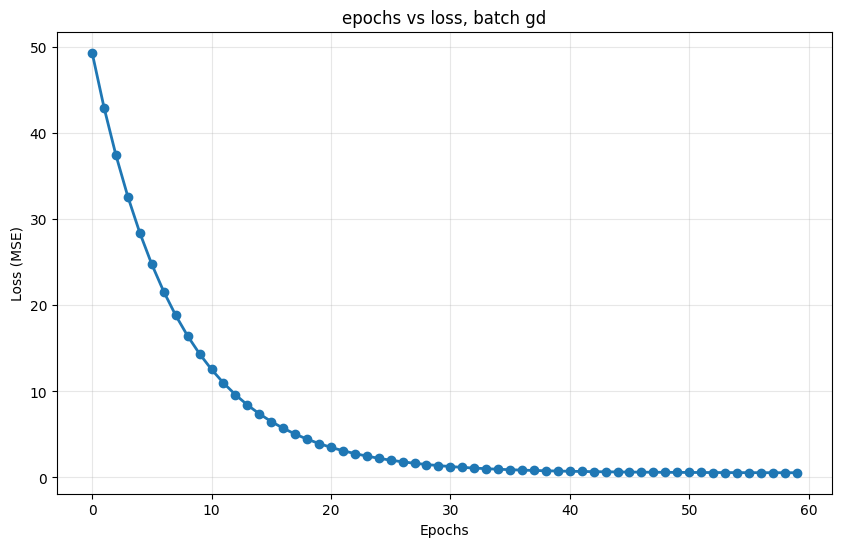

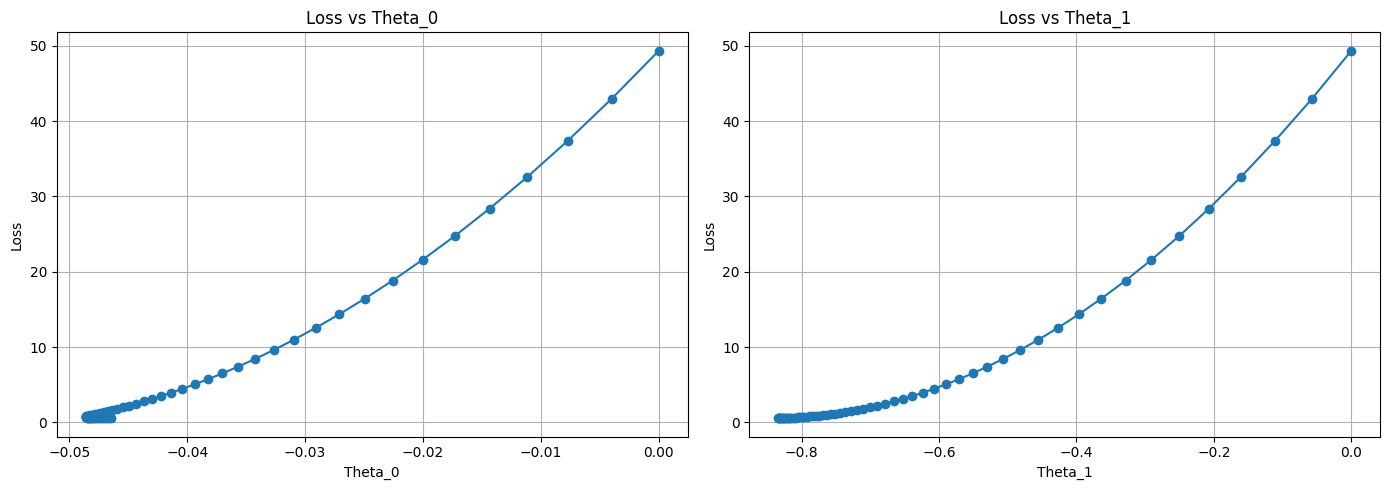

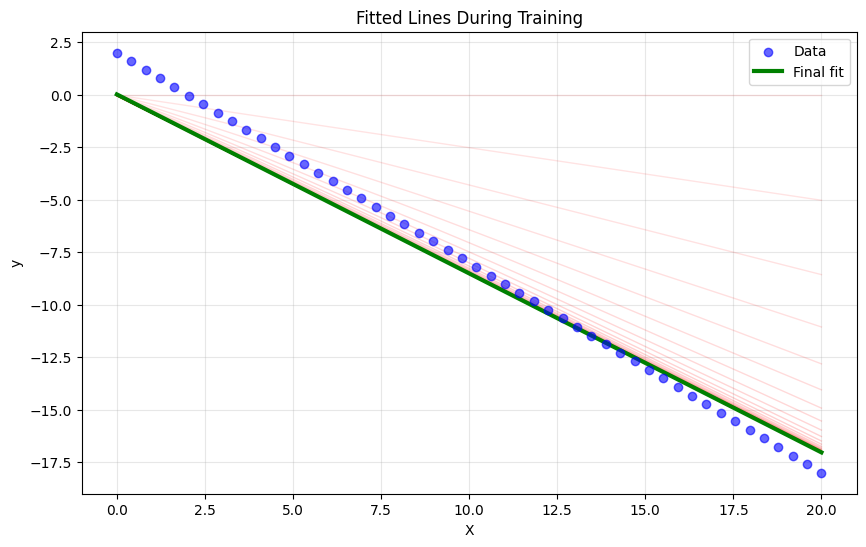

In [45]:
plot_loss_vs_epochs(loss_hist[:60], 'epochs vs loss, batch gd')
plot_theta_vs_loss(theta0_hist[:60], theta1_hist[:60], loss_hist[:60])
plot_fitted_lines(X, y, theta0_hist, theta1_hist, 5)


### Update your Batch GD for single variable  implementation (Batch variant) to be Momentum-Based GD and check your results

#### γ takes values between 0 and 1.

In [46]:
def momentum_batch_gd_single_var(X, y, GAMMA = 0.05, LR=0.01, TOL=1E-6, MAX_ITER=1000):
   
    m = len(X)
    
    # Initialize
    theta_0 = 0.0
    theta_1 = 0.0

    momentum_0 = 0
    momentum_1 = 0
    
    loss_history = []
    theta0_history = [theta_0]
    theta1_history = [theta_1]
    
    for iter in range(MAX_ITER):
        # Predict
        h_x = theta_0 + theta_1 * X
        
        # Loss
        error = h_x - y
        j = np.sum(error**2) / (2 * m)
        loss_history.append(j)

        # Grad
        grad_theta_0 = (1/m) * np.sum(error)
        grad_theta_1 = (1/m) * np.sum(error * X)

        # momentum
        momentum_0 = GAMMA * momentum_0 + LR * grad_theta_0
        momentum_1 = GAMMA * momentum_1 + LR * grad_theta_1
        
        # Update parameters SIMULTANEOUSLY
        theta_0 -= momentum_0
        theta_1 -= momentum_1
        
        # Append to history AFTER update
        theta0_history.append(theta_0)
        theta1_history.append(theta_1)
        
        # Convergence check
        if iter > 0 and np.abs(loss_history[-1] - loss_history[-2]) < TOL:
            print(f'Converged at iteration {iter}')
            break
    
    return theta_0, theta_1, loss_history, theta0_history, theta1_history

#### Try your function with any input parameterss of your choice.
##### The following results uses alpha = 0.0005, gamma=0.5 and max. iterations = 300.

In [47]:
theta_0_M, theta_1_M, loss_history_M, theta0_history_M, theta1_history_M = \
momentum_batch_gd_single_var(X, y,GAMMA= 0.5, LR= .0005, MAX_ITER= 300)
h_M = theta_0_M + theta_1_M * X
r2_score(y, h_M)

0.972892479332971

****************** Iteration 0 ********************

h(x):
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector:
[-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]

j = 49.34693877551021

Gradient Vector:
[[  8.        ]
 [114.69387755]]

Gradient Vector Norm:
114.97254258164628

v_0 : 0.004
v_1 : 0.05734693877551021

theta_0

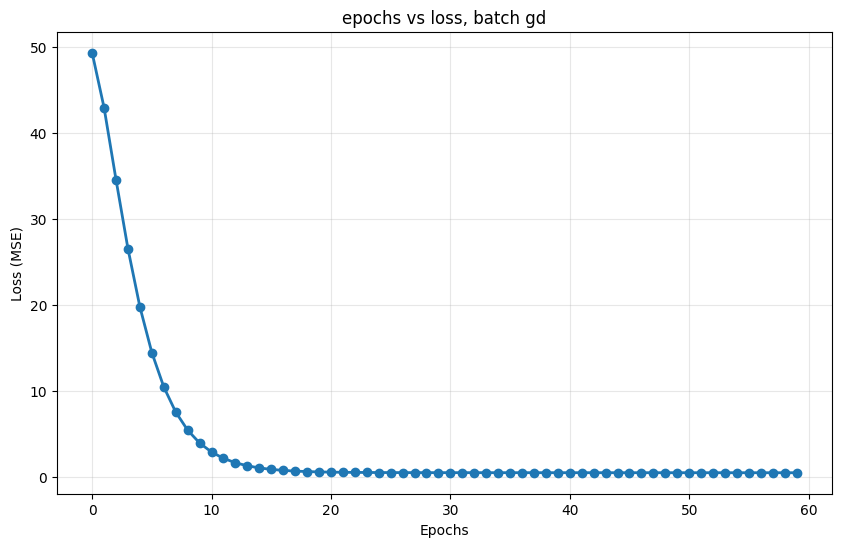

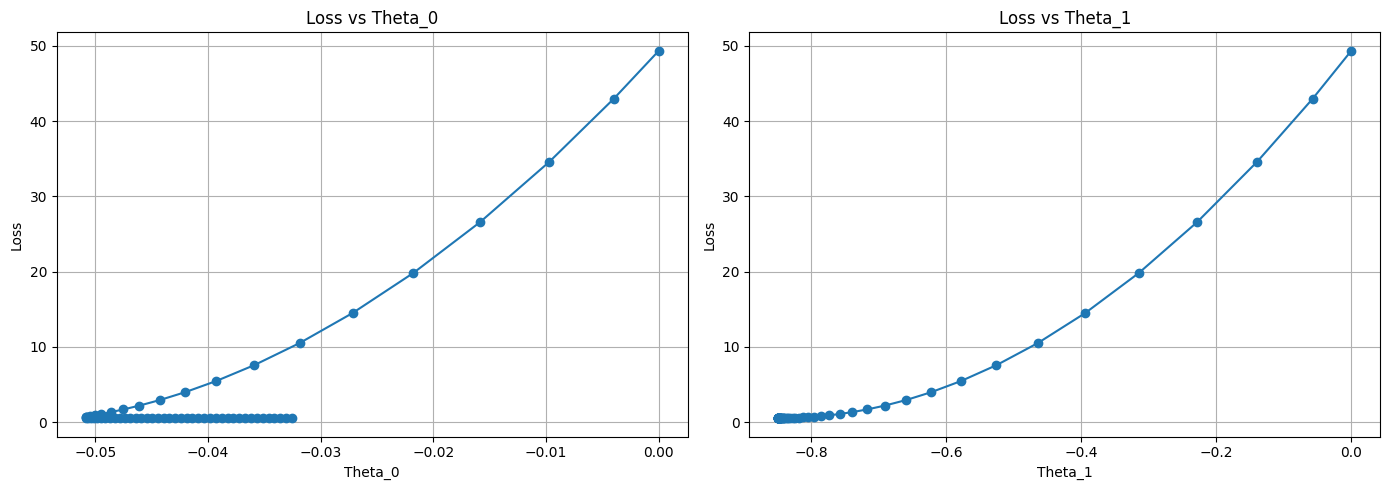

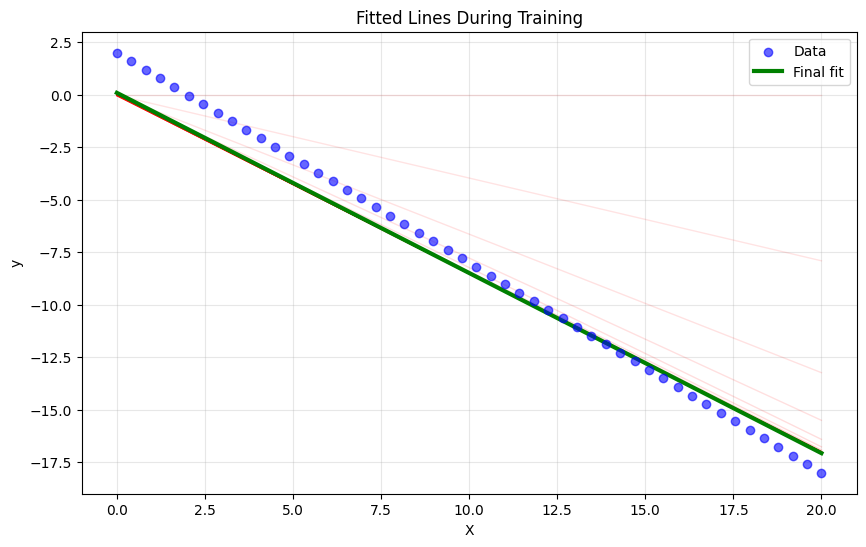

In [54]:
plot_loss_vs_epochs(loss_history_M[:60], 'epochs vs loss, batch gd')
plot_theta_vs_loss(theta0_history_M[:60], theta1_history_M[:60], loss_history_M[:60])
plot_fitted_lines(X, y, theta0_history_M, theta1_history_M, 5)


#### Try another values of momentum term and check your reults.
#### Try very large values close to one and very small values close to zero. 
#### Try momentum = 0

##### The following results uses alpha = 0.0005, gamma=0.9 and max. iterations = 300.

In [55]:
theta_0_M, theta_1_M, loss_history_M, theta0_history_M, theta1_history_M = \
momentum_batch_gd_single_var(X, y,GAMMA= 0.9, LR= .0005, MAX_ITER= 300)
h_M = theta_0_M + theta_1_M * X
r2_score(y, h_M)

0.9851382538862453

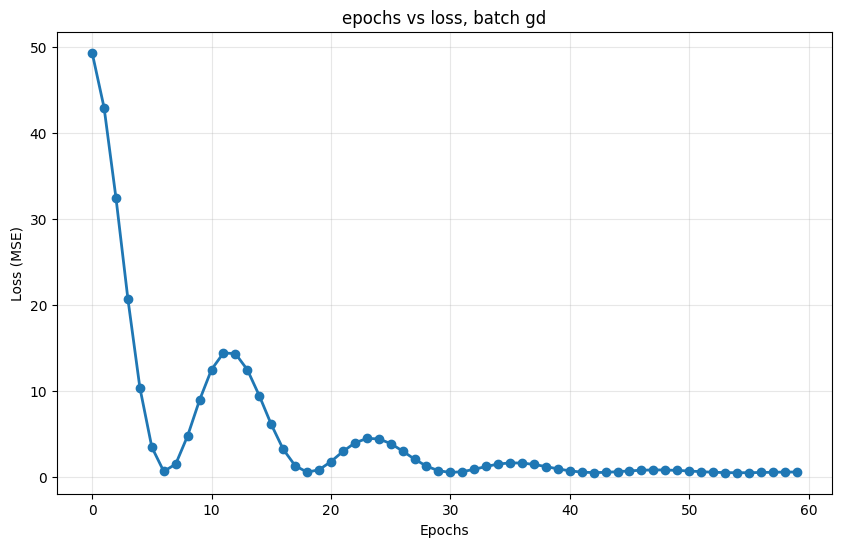

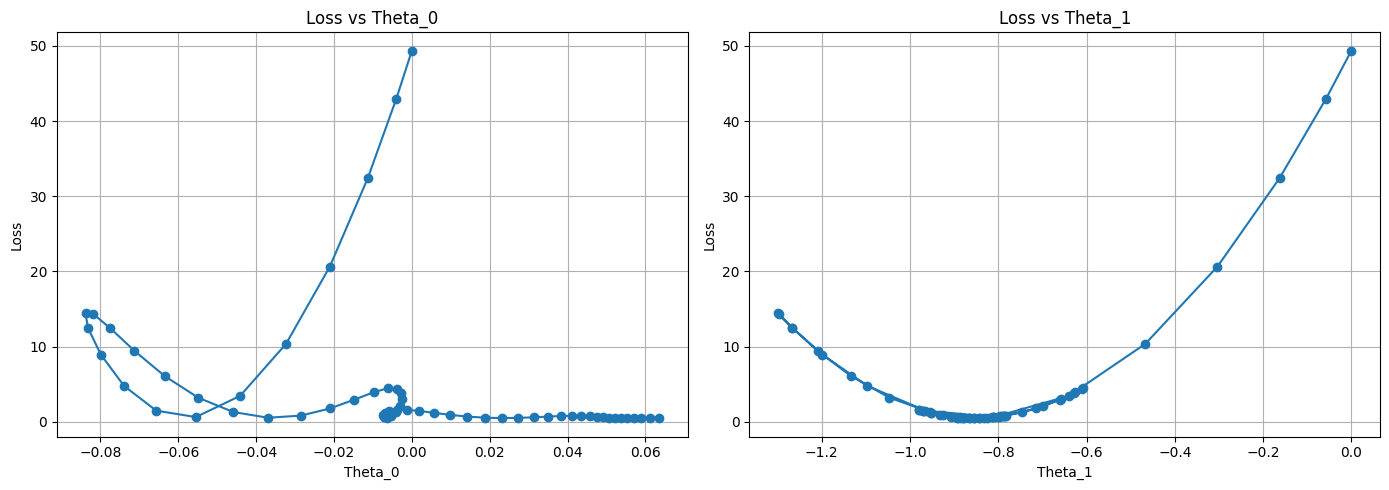

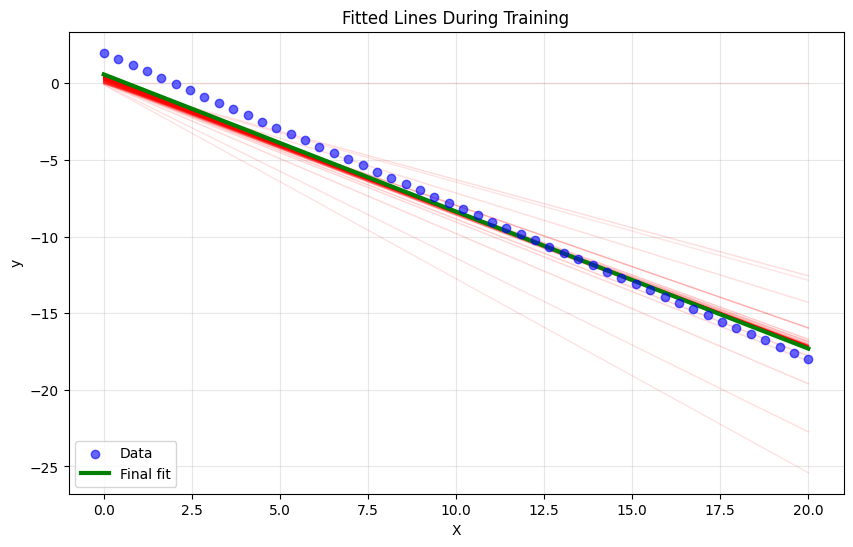

In [56]:
plot_loss_vs_epochs(loss_history_M[:60], 'epochs vs loss, batch gd')
plot_theta_vs_loss(theta0_history_M[:60], theta1_history_M[:60], loss_history_M[:60])
plot_fitted_lines(X, y, theta0_history_M, theta1_history_M, 5)


##### The following results uses alpha = 0.0005, gamma=0.89 and max. iterations = 300.

In [57]:
theta_0_M, theta_1_M, loss_history_M, theta0_history_M, theta1_history_M = \
momentum_batch_gd_single_var(X, y,GAMMA= 0.89, LR= .0005, MAX_ITER= 300)
h_M = theta_0_M + theta_1_M * X
r2_score(y, h_M)

0.9840948111189305

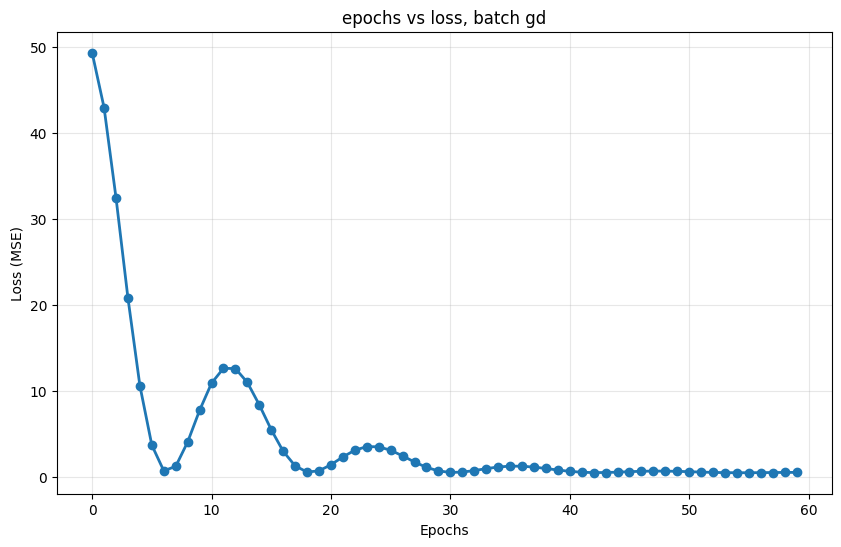

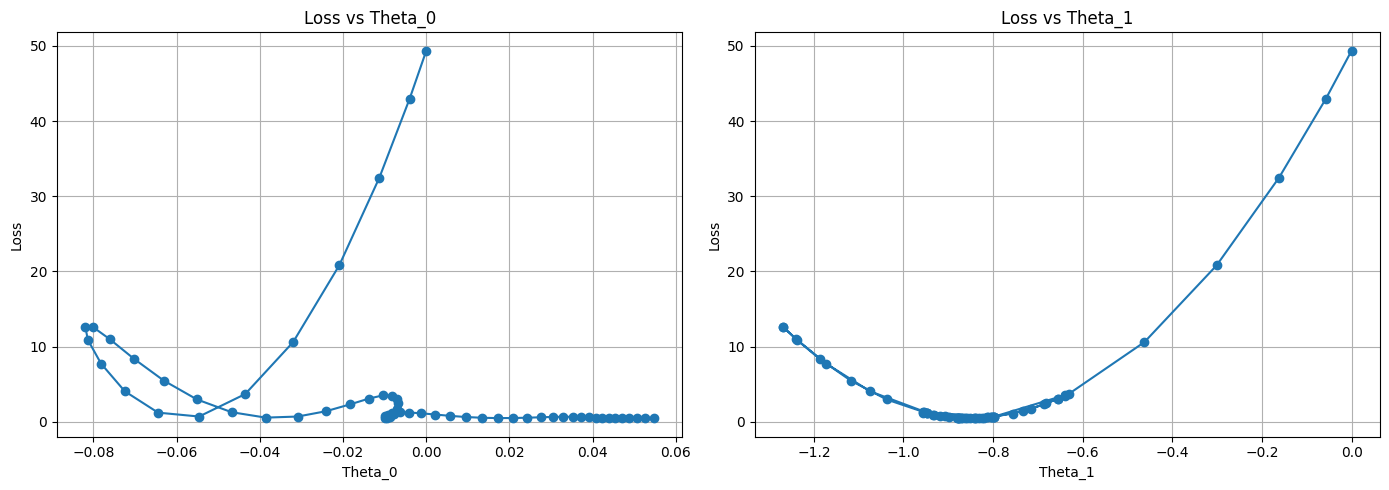

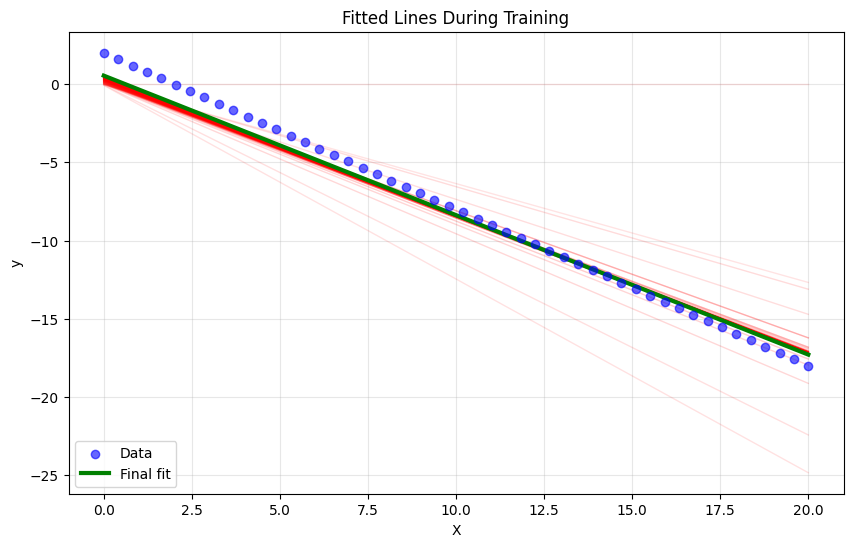

In [59]:
plot_loss_vs_epochs(loss_history_M[:60], 'epochs vs loss, batch gd')
plot_theta_vs_loss(theta0_history_M[:60], theta1_history_M[:60], loss_history_M[:60])
plot_fitted_lines(X, y, theta0_history_M, theta1_history_M, 5)


### Do not forget:

#### Try another values of momentum term and check your reults.
#### Try very large values close to one and very small values close to zero. 
#### Try momentum = 0

0.9707406024215084


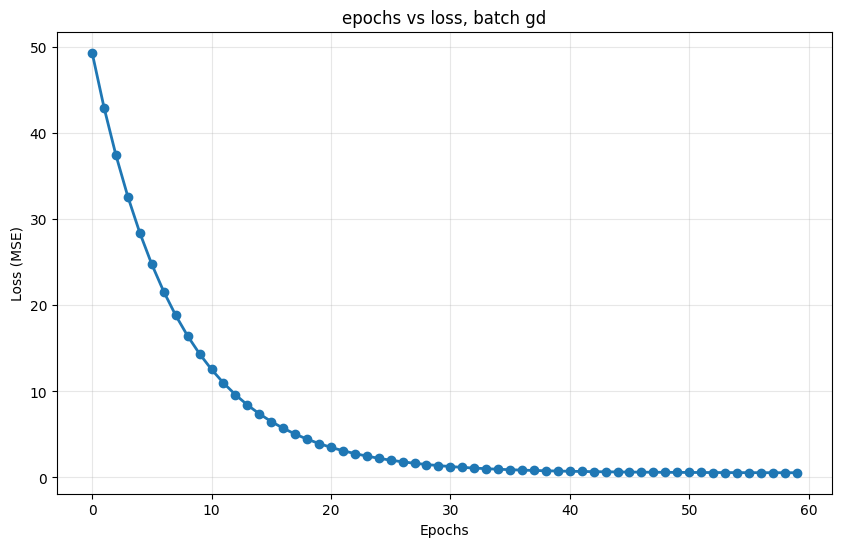

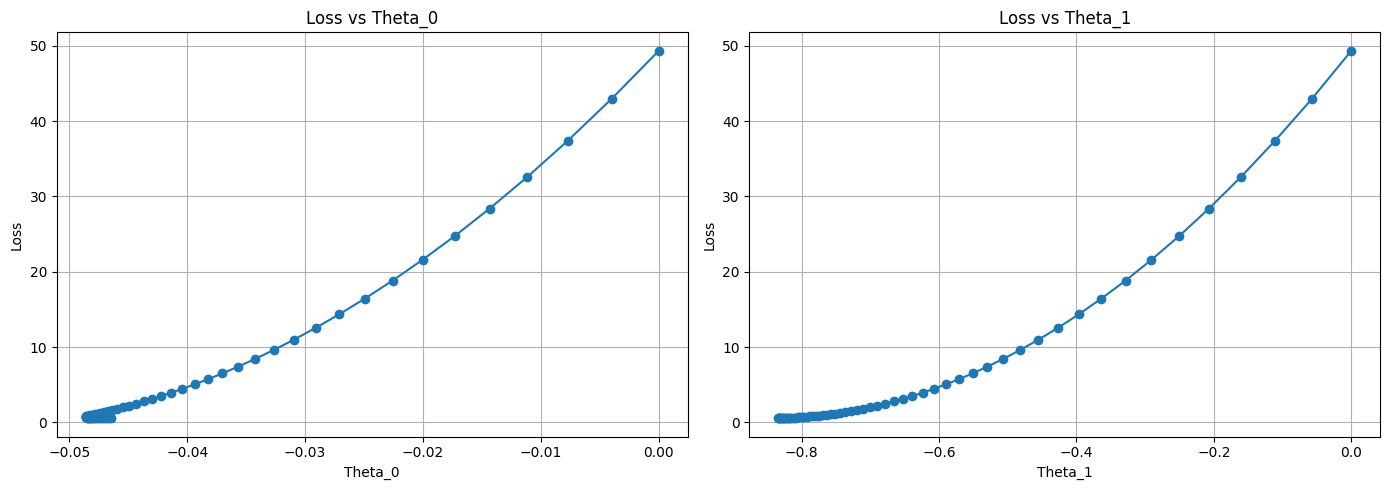

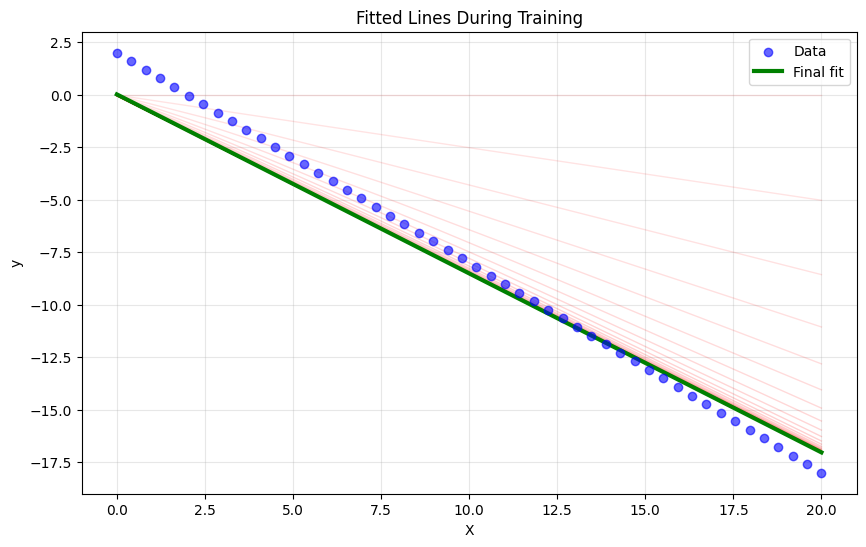

In [63]:
theta_0_M, theta_1_M, loss_history_M, theta0_history_M, theta1_history_M = \
momentum_batch_gd_single_var(X, y,GAMMA= 0, LR= .0005, MAX_ITER= 300)
h_M = theta_0_M + theta_1_M * X
print(r2_score(y, h_M))
plot_loss_vs_epochs(loss_history_M[:60], 'epochs vs loss, batch gd')
plot_theta_vs_loss(theta0_history_M[:60], theta1_history_M[:60], loss_history_M[:60])
plot_fitted_lines(X, y, theta0_history_M, theta1_history_M, 5)


### Update your Batch GD for one variable  implementation to be NAG and check your results

##### Very Important:
- <b><font color='red'> In order to calculate the gradient at theta_temp, you will need to calculate the prediction (hypothesis output) using theta_temp. </font></b> 
##### h_temp = theta0_temp + theta1_temp * X 

In [ ]:
def NAG_batch_gd_single_var(X, y, GAMMA = 0.05, LR=0.01, TOL=1E-6, MAX_ITER=1000):
   
    m = len(X)
    
    # Initialize
    theta_0 = 0.0
    theta_1 = 0.0

    momentum_0 = 0
    momentum_1 = 0

    theta_0_temp = 0
    theta_1_temp = 0
    
    loss_history = []
    theta0_history = [theta_0]
    theta1_history = [theta_1]
    
    for iter in range(MAX_ITER):
        ##### theta temp update
        theta_0_temp  = theta_0 - GAMMA * momentum_0
        theta_1_temp  = theta_1 - GAMMA * momentum_1
        # Predict
        h_x = theta_0 + theta_1 * X
        h_temp = theta_0_temp + theta_1_temp * X
        
        # Loss
        error = h_x - y
        error_temp = h_temp - y
        j      = np.sum(error**2) / (2 * m)
        j_temp = np.sum(error_temp **2) / (2*m)
        loss_history.append(j)

        # Grad
        grad_theta_0 = (1/m) * np.sum(error)
        grad_theta_1 = (1/m) * np.sum(error * X)

        grad_theta_0_temp = (1/m) * np.sum(error_temp)
        grad_theta_1_temp = (1/m) * np.sum(error_temp * X)

        # momentum -> to be used to get theta_0_temp => next iter
        momentum_0 = GAMMA * momentum_0 + LR * grad_theta_0_temp
        momentum_1 = GAMMA * momentum_1 + LR * grad_theta_1_temp
        
        # Update parameters SIMULTANEOUSLY
        theta_0 = theta_0_temp - LR * grad_theta_0_temp
        theta_1 = theta_1_temp - LR * grad_theta_1_temp
        
        # Append to history AFTER update
        theta0_history.append(theta_0)
        theta1_history.append(theta_1)
        
        # Convergence check
        if iter > 0 and np.abs(loss_history[-1] - loss_history[-2]) < TOL:
            print(f'Converged at iteration {iter}')
            break
    
    return theta_0, theta_1, loss_history, theta0_history, theta1_history

##### The following results uses alpha = 0.0005, gamma=0.9 and max. iterations = 300.

0.9851254759827675


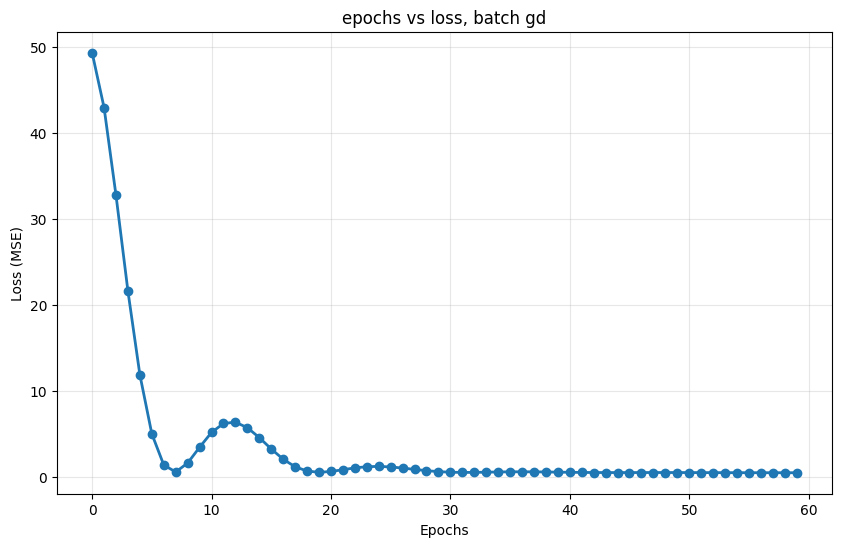

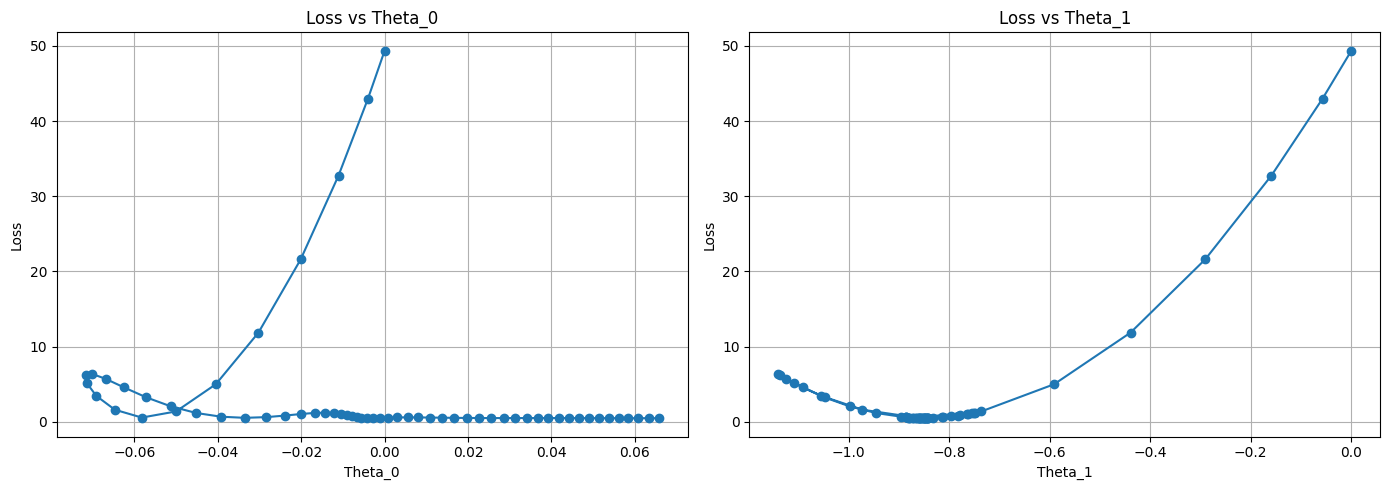

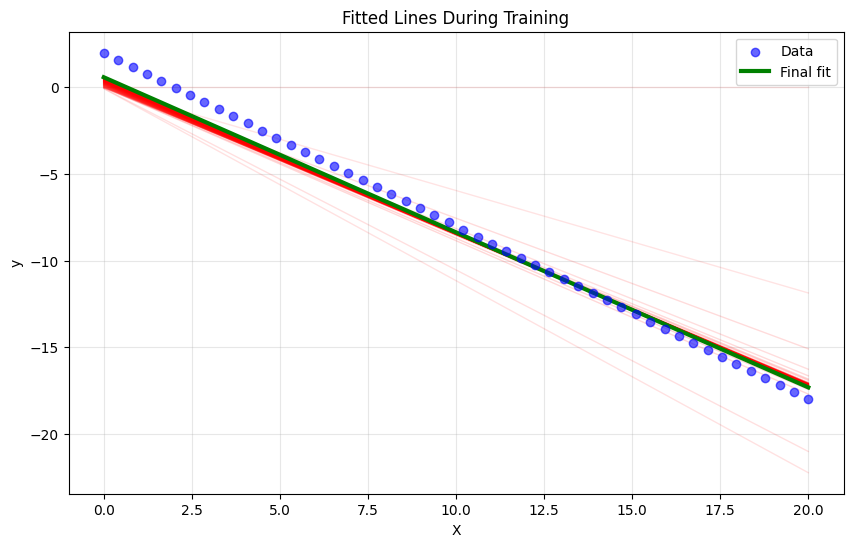

In [67]:
theta_0_NAG, theta_1_NAG, loss_history_NAG, theta0_history_NAG, theta1_history_NAG = \
NAG_batch_gd_single_var(X, y,GAMMA= 0.9, LR= .0005, MAX_ITER= 300)
h_NAG = theta_0_NAG + theta_1_NAG * X
print(r2_score(y, h_NAG))
plot_loss_vs_epochs(loss_history_NAG[:60], 'epochs vs loss, batch gd')
plot_theta_vs_loss(theta0_history_NAG[:60], theta1_history_NAG[:60], loss_history_NAG[:60])
plot_fitted_lines(X, y, theta0_history_NAG, theta1_history_NAG, 5)


##### The following results uses alpha = 0.0005, gamma=0.89 and max. iterations = 300.

0.9840836337110338


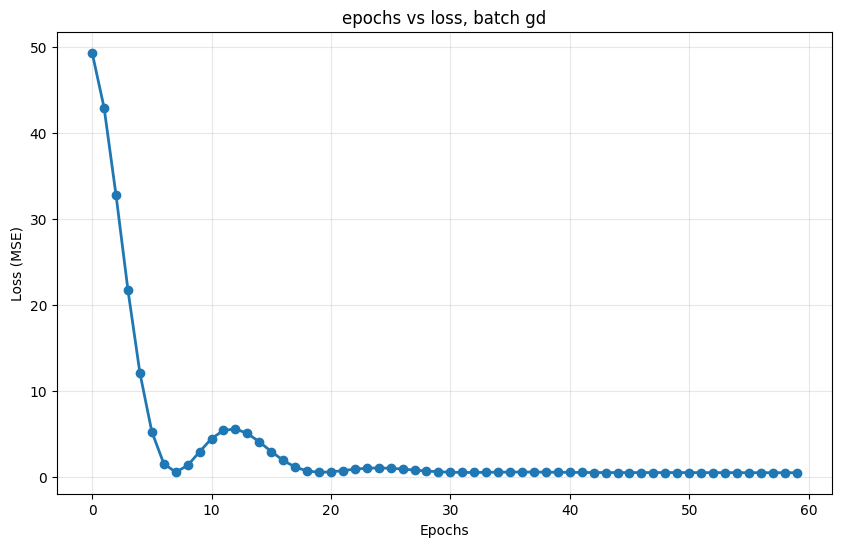

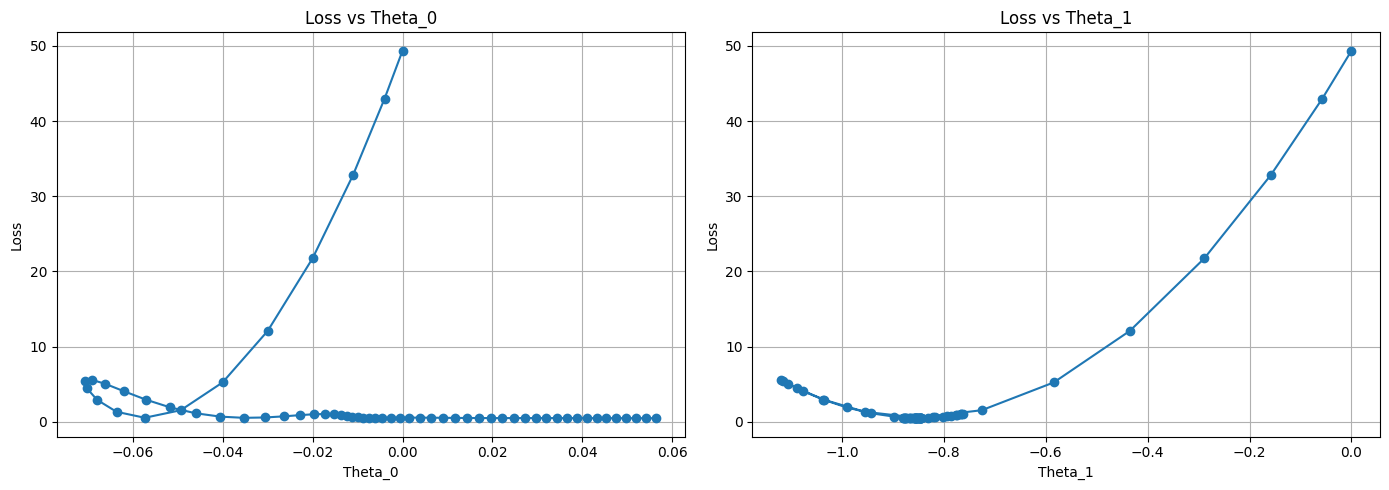

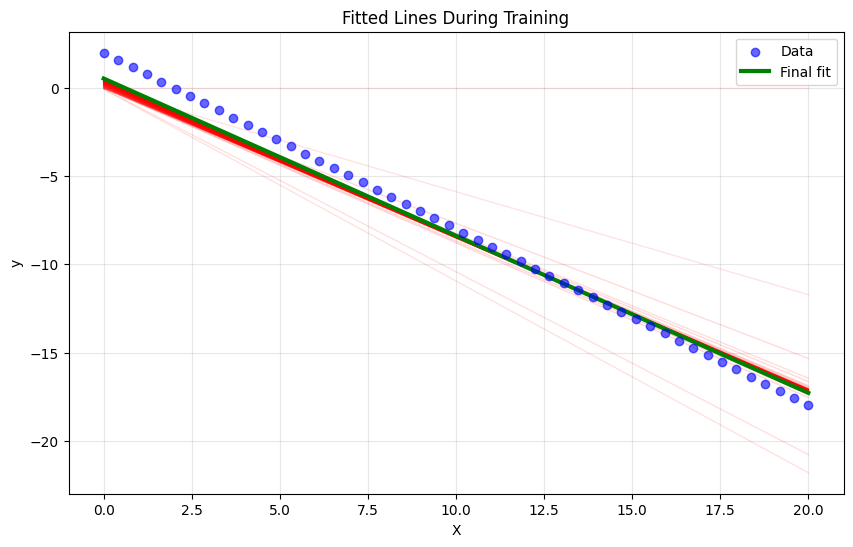

In [68]:
theta_0_NAG, theta_1_NAG, loss_history_NAG, theta0_history_NAG, theta1_history_NAG = \
NAG_batch_gd_single_var(X, y,GAMMA= 0.89, LR= .0005, MAX_ITER= 300)
h_NAG = theta_0_NAG + theta_1_NAG * X
print(r2_score(y, h_NAG))
plot_loss_vs_epochs(loss_history_NAG[:60], 'epochs vs loss, batch gd')
plot_theta_vs_loss(theta0_history_NAG[:60], theta1_history_NAG[:60], loss_history_NAG[:60])
plot_fitted_lines(X, y, theta0_history_NAG, theta1_history_NAG, 5)


# 2D Example -> AI generated bonus for 2D visualization

Data shape: X=(100, 2), y=(100,)
True parameters: θ₀=3.0, θ₁=2.0, θ₂=-1.5
BATCH GRADIENT DESCENT
Final parameters: θ₀=2.3047, θ₁=2.0377, θ₂=-1.4045
True parameters:  θ₀=3.0000, θ₁=2.0000, θ₂=-1.5000
R² score: 0.994503
Final loss: 0.150232

MOMENTUM (γ=0.7)
Converged at iteration 874
Final parameters: θ₀=2.9194, θ₁=1.9859, θ₂=-1.4608
R² score: 0.995668
Final loss: 0.118307

NAG (γ=0.7)
Converged at iteration 876
Final parameters: θ₀=2.9192, θ₁=1.9860, θ₂=-1.4607
R² score: 0.995668
Final loss: 0.118308


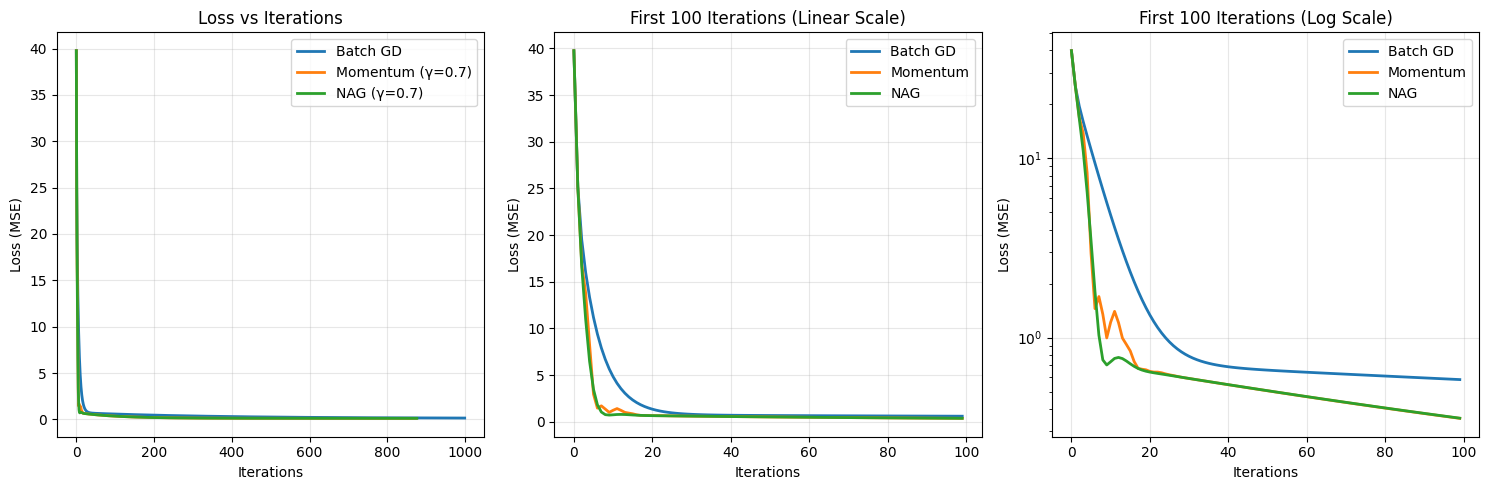

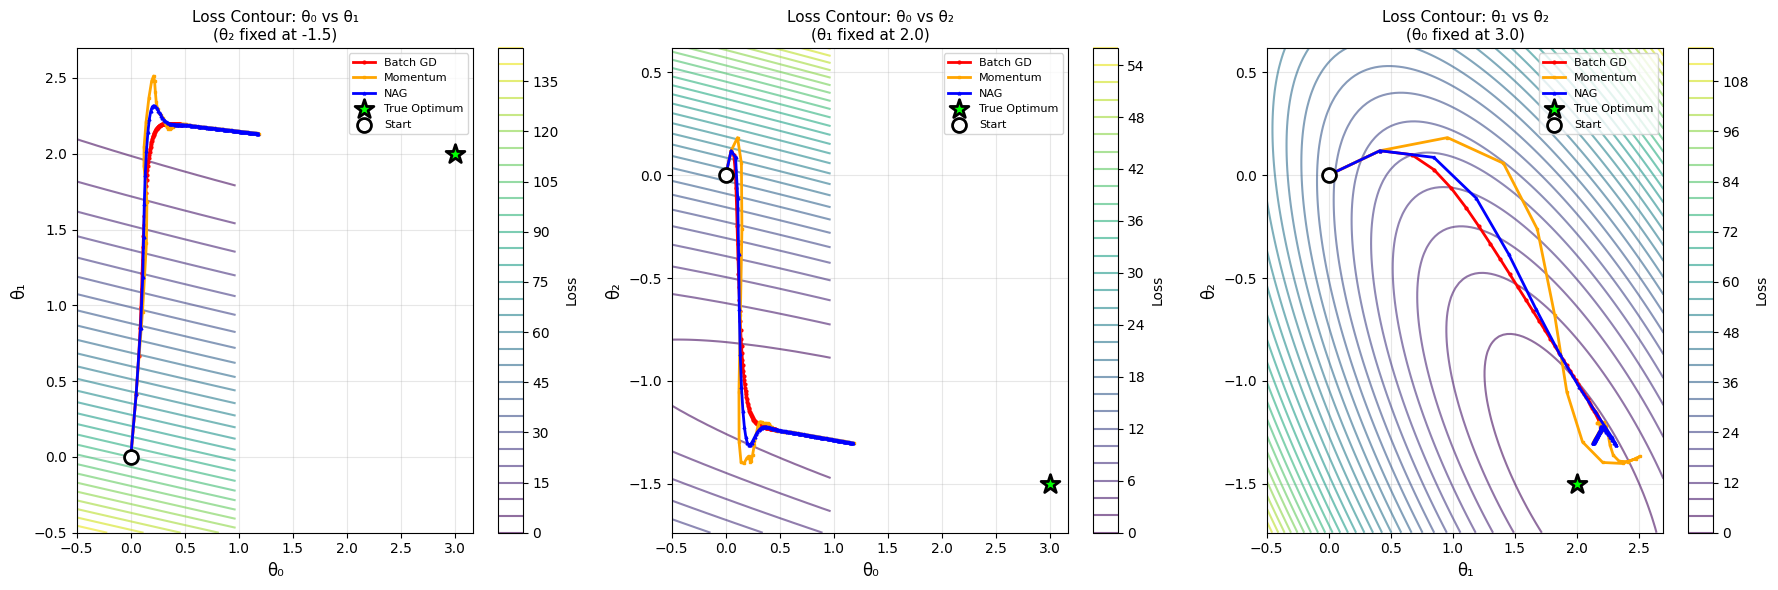

In [72]:
# %% [markdown]
# # 2D Linear Regression Example
# Multiple Variable Linear Regression: y = θ₀ + θ₁*x₁ + θ₂*x₂

# %%
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import r2_score

# %% [markdown]
# ## Generate 2D Dataset
# We'll create data following: y = 3 + 2*x₁ - 1.5*x₂ + noise

# %%
np.random.seed(42)

# Generate 100 data points
n_samples = 100

# Two features
X1 = np.random.uniform(0, 10, n_samples)
X2 = np.random.uniform(0, 10, n_samples)

# Stack features into matrix (n_samples, 2)
X = np.column_stack([X1, X2])

# True parameters
theta_0_true = 3.0
theta_1_true = 2.0
theta_2_true = -1.5

# Generate target with small noise
noise = np.random.normal(0, 0.5, n_samples)
y = theta_0_true + theta_1_true * X1 + theta_2_true * X2 + noise

print(f"Data shape: X={X.shape}, y={y.shape}")
print(f"True parameters: θ₀={theta_0_true}, θ₁={theta_1_true}, θ₂={theta_2_true}")

# ## Batch Gradient Descent (2D)

# %%
def batch_gd_2d(X, y, LR=0.01, TOL=1e-6, MAX_ITER=1000):
    """
    Batch Gradient Descent for 2 features
    X: (n_samples, 2) feature matrix
    y: (n_samples,) target vector
    """
    m = len(y)
    
    # Initialize parameters
    theta_0 = 0.0
    theta_1 = 0.0
    theta_2 = 0.0
    
    loss_history = []
    theta0_history = [theta_0]
    theta1_history = [theta_1]
    theta2_history = [theta_2]
    
    for iter in range(MAX_ITER):
        # Predict: h(x) = θ₀ + θ₁*x₁ + θ₂*x₂
        h = theta_0 + theta_1 * X[:, 0] + theta_2 * X[:, 1]
        
        # Loss (MSE)
        error = h - y
        j = np.sum(error**2) / (2 * m)
        loss_history.append(j)
        
        # Gradients
        grad_theta_0 = (1/m) * np.sum(error)
        grad_theta_1 = (1/m) * np.sum(error * X[:, 0])
        grad_theta_2 = (1/m) * np.sum(error * X[:, 1])
        
        # Update parameters
        theta_0 -= LR * grad_theta_0
        theta_1 -= LR * grad_theta_1
        theta_2 -= LR * grad_theta_2
        
        # Save history
        theta0_history.append(theta_0)
        theta1_history.append(theta_1)
        theta2_history.append(theta_2)
        
        # Convergence check
        if iter > 0 and np.abs(loss_history[-1] - loss_history[-2]) < TOL:
            print(f'Converged at iteration {iter}')
            break
    
    return (theta_0, theta_1, theta_2, loss_history, 
            theta0_history, theta1_history, theta2_history)

# %% [markdown]
# ## Momentum Gradient Descent (2D)

# %%
def momentum_gd_2d(X, y, LR=0.01, GAMMA=0.9, TOL=1e-6, MAX_ITER=1000):
    """Momentum-based Gradient Descent for 2 features"""
    m = len(y)
    
    # Initialize parameters
    theta_0 = 0.0
    theta_1 = 0.0
    theta_2 = 0.0
    
    # Initialize velocities
    v_0 = 0.0
    v_1 = 0.0
    v_2 = 0.0
    
    loss_history = []
    theta0_history = [theta_0]
    theta1_history = [theta_1]
    theta2_history = [theta_2]
    
    for iter in range(MAX_ITER):
        # Predict
        h = theta_0 + theta_1 * X[:, 0] + theta_2 * X[:, 1]
        
        # Loss
        error = h - y
        j = np.sum(error**2) / (2 * m)
        loss_history.append(j)
        
        # Gradients
        grad_theta_0 = (1/m) * np.sum(error)
        grad_theta_1 = (1/m) * np.sum(error * X[:, 0])
        grad_theta_2 = (1/m) * np.sum(error * X[:, 1])
        
        # Update velocities
        v_0 = GAMMA * v_0 + LR * grad_theta_0
        v_1 = GAMMA * v_1 + LR * grad_theta_1
        v_2 = GAMMA * v_2 + LR * grad_theta_2
        
        # Update parameters
        theta_0 -= v_0
        theta_1 -= v_1
        theta_2 -= v_2
        
        # Save history
        theta0_history.append(theta_0)
        theta1_history.append(theta_1)
        theta2_history.append(theta_2)
        
        # Convergence check
        if iter > 0 and np.abs(loss_history[-1] - loss_history[-2]) < TOL:
            print(f'Converged at iteration {iter}')
            break
    
    return (theta_0, theta_1, theta_2, loss_history, 
            theta0_history, theta1_history, theta2_history)

# %% [markdown]
# ## NAG (Nesterov Accelerated Gradient) - 2D

# %%
def nag_2d(X, y, LR=0.01, GAMMA=0.9, TOL=1e-6, MAX_ITER=1000):
    """Nesterov Accelerated Gradient for 2 features"""
    m = len(y)
    
    # Initialize parameters
    theta_0 = 0.0
    theta_1 = 0.0
    theta_2 = 0.0
    
    # Initialize velocities
    v_0 = 0.0
    v_1 = 0.0
    v_2 = 0.0
    
    loss_history = []
    theta0_history = [theta_0]
    theta1_history = [theta_1]
    theta2_history = [theta_2]
    
    for iter in range(MAX_ITER):
        # Look-ahead parameters
        theta_0_temp = theta_0 - GAMMA * v_0
        theta_1_temp = theta_1 - GAMMA * v_1
        theta_2_temp = theta_2 - GAMMA * v_2
        
        # Predict at look-ahead position
        h_temp = theta_0_temp + theta_1_temp * X[:, 0] + theta_2_temp * X[:, 1]
        
        # Loss at current position (for tracking)
        h_current = theta_0 + theta_1 * X[:, 0] + theta_2 * X[:, 1]
        error_current = h_current - y
        j = np.sum(error_current**2) / (2 * m)
        loss_history.append(j)
        
        # Gradients at look-ahead position
        error_temp = h_temp - y
        grad_theta_0 = (1/m) * np.sum(error_temp)
        grad_theta_1 = (1/m) * np.sum(error_temp * X[:, 0])
        grad_theta_2 = (1/m) * np.sum(error_temp * X[:, 1])
        
        # Update velocities
        v_0 = GAMMA * v_0 + LR * grad_theta_0
        v_1 = GAMMA * v_1 + LR * grad_theta_1
        v_2 = GAMMA * v_2 + LR * grad_theta_2
        
        # Update parameters
        theta_0 -= v_0
        theta_1 -= v_1
        theta_2 -= v_2
        
        # Save history
        theta0_history.append(theta_0)
        theta1_history.append(theta_1)
        theta2_history.append(theta_2)
        
        # Convergence check
        if iter > 0 and np.abs(loss_history[-1] - loss_history[-2]) < TOL:
            print(f'Converged at iteration {iter}')
            break
    
    return (theta_0, theta_1, theta_2, loss_history, 
            theta0_history, theta1_history, theta2_history)

# %% [markdown]
# ## Train All Models

# %%
print("=" * 60)
print("BATCH GRADIENT DESCENT")
print("=" * 60)
theta0_gd, theta1_gd, theta2_gd, loss_gd, th0_hist_gd, th1_hist_gd, th2_hist_gd = \
    batch_gd_2d(X, y, LR=0.01, MAX_ITER=1000)

y_pred_gd = theta0_gd + theta1_gd * X[:, 0] + theta2_gd * X[:, 1]
r2_gd = r2_score(y, y_pred_gd)

print(f"Final parameters: θ₀={theta0_gd:.4f}, θ₁={theta1_gd:.4f}, θ₂={theta2_gd:.4f}")
print(f"True parameters:  θ₀={theta_0_true:.4f}, θ₁={theta_1_true:.4f}, θ₂={theta_2_true:.4f}")
print(f"R² score: {r2_gd:.6f}")
print(f"Final loss: {loss_gd[-1]:.6f}\n")

print("=" * 60)
print("MOMENTUM (γ=0.7)")
print("=" * 60)
theta0_m, theta1_m, theta2_m, loss_m, th0_hist_m, th1_hist_m, th2_hist_m = \
    momentum_gd_2d(X, y, LR=0.01, GAMMA=0.7, MAX_ITER=1000)

y_pred_m = theta0_m + theta1_m * X[:, 0] + theta2_m * X[:, 1]
r2_m = r2_score(y, y_pred_m)

print(f"Final parameters: θ₀={theta0_m:.4f}, θ₁={theta1_m:.4f}, θ₂={theta2_m:.4f}")
print(f"R² score: {r2_m:.6f}")
print(f"Final loss: {loss_m[-1]:.6f}\n")

print("=" * 60)
print("NAG (γ=0.7)")
print("=" * 60)
theta0_n, theta1_n, theta2_n, loss_n, th0_hist_n, th1_hist_n, th2_hist_n = \
    nag_2d(X, y, LR=0.01, GAMMA=0.7, MAX_ITER=1000)

y_pred_n = theta0_n + theta1_n * X[:, 0] + theta2_n * X[:, 1]
r2_n = r2_score(y, y_pred_n)

print(f"Final parameters: θ₀={theta0_n:.4f}, θ₁={theta1_n:.4f}, θ₂={theta2_n:.4f}")
print(f"R² score: {r2_n:.6f}")
print(f"Final loss: {loss_n[-1]:.6f}")

# %% [markdown]
# ## Visualization: Loss Curves

# %%
plt.figure(figsize=(15, 5))

# Loss vs iterations
plt.subplot(1, 3, 1)
plt.plot(loss_gd, label='Batch GD', linewidth=2)
plt.plot(loss_m, label='Momentum (γ=0.7)', linewidth=2)
plt.plot(loss_n, label='NAG (γ=0.7)', linewidth=2)
plt.xlabel('Iterations')
plt.ylabel('Loss (MSE)')
plt.title('Loss vs Iterations')
plt.legend()
plt.grid(True, alpha=0.3)

# First 100 iterations - linear scale
plt.subplot(1, 3, 2)
plt.plot(loss_gd[:100], label='Batch GD', linewidth=2)
plt.plot(loss_m[:100], label='Momentum', linewidth=2)
plt.plot(loss_n[:100], label='NAG', linewidth=2)
plt.xlabel('Iterations')
plt.ylabel('Loss (MSE)')
plt.title('First 100 Iterations (Linear Scale)')
plt.legend()
plt.grid(True, alpha=0.3)

# Log scale
plt.subplot(1, 3, 3)
plt.plot(loss_gd[:100], label='Batch GD', linewidth=2)
plt.plot(loss_m[:100], label='Momentum', linewidth=2)
plt.plot(loss_n[:100], label='NAG', linewidth=2)
plt.xlabel('Iterations')
plt.ylabel('Loss (MSE)')
plt.title('First 100 Iterations (Log Scale)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.yscale('log')

plt.tight_layout()
plt.show()

# %% [markdown]
# ## Contour Plots: Loss Surface with Trajectories

# %%
def compute_loss_grid(X, y, theta0_range, theta1_range, theta2_fixed):
    """Compute loss on a grid for contour plotting"""
    m = len(y)
    T0, T1 = np.meshgrid(theta0_range, theta1_range)
    Z = np.zeros_like(T0)
    
    for i in range(len(theta0_range)):
        for j in range(len(theta1_range)):
            h = T0[j, i] + T1[j, i] * X[:, 0] + theta2_fixed * X[:, 1]
            Z[j, i] = np.sum((h - y)**2) / (2 * m)
    
    return T0, T1, Z

# Create grids for each pair of parameters
# θ₀-θ₁ plane (fix θ₂ at true value)
theta0_range_01 = np.linspace(min(th0_hist_gd[:100]) - 0.5, 
                               max(th0_hist_gd[:100]) + 0.5, 100)
theta1_range_01 = np.linspace(min(th1_hist_gd[:100]) - 0.5, 
                               max(th1_hist_gd[:100]) + 0.5, 100)
T0_01, T1_01, Z_01 = compute_loss_grid(X, y, theta0_range_01, theta1_range_01, theta_2_true)

# θ₀-θ₂ plane (fix θ₁ at true value)
theta0_range_02 = np.linspace(min(th0_hist_gd[:100]) - 0.5, 
                               max(th0_hist_gd[:100]) + 0.5, 100)
theta2_range_02 = np.linspace(min(th2_hist_gd[:100]) - 0.5, 
                               max(th2_hist_gd[:100]) + 0.5, 100)

def compute_loss_grid_02(X, y, theta0_range, theta2_range, theta1_fixed):
    """Compute loss for θ₀-θ₂ plane"""
    m = len(y)
    T0, T2 = np.meshgrid(theta0_range, theta2_range)
    Z = np.zeros_like(T0)
    
    for i in range(len(theta0_range)):
        for j in range(len(theta2_range)):
            h = T0[j, i] + theta1_fixed * X[:, 0] + T2[j, i] * X[:, 1]
            Z[j, i] = np.sum((h - y)**2) / (2 * m)
    
    return T0, T2, Z

T0_02, T2_02, Z_02 = compute_loss_grid_02(X, y, theta0_range_02, theta2_range_02, theta_1_true)

# θ₁-θ₂ plane (fix θ₀ at true value)
theta1_range_12 = np.linspace(min(th1_hist_gd[:100]) - 0.5, 
                               max(th1_hist_gd[:100]) + 0.5, 100)
theta2_range_12 = np.linspace(min(th2_hist_gd[:100]) - 0.5, 
                               max(th2_hist_gd[:100]) + 0.5, 100)

def compute_loss_grid_12(X, y, theta1_range, theta2_range, theta0_fixed):
    """Compute loss for θ₁-θ₂ plane"""
    m = len(y)
    T1, T2 = np.meshgrid(theta1_range, theta2_range)
    Z = np.zeros_like(T1)
    
    for i in range(len(theta1_range)):
        for j in range(len(theta2_range)):
            h = theta0_fixed + T1[j, i] * X[:, 0] + T2[j, i] * X[:, 1]
            Z[j, i] = np.sum((h - y)**2) / (2 * m)
    
    return T1, T2, Z

T1_12, T2_12, Z_12 = compute_loss_grid_12(X, y, theta1_range_12, theta2_range_12, theta_0_true)

# Plot contours
fig = plt.figure(figsize=(18, 6))

# θ₀-θ₁ contour
ax1 = fig.add_subplot(131)
contour1 = ax1.contour(T0_01, T1_01, Z_01, levels=30, cmap='viridis', alpha=0.6)
ax1.plot(th0_hist_gd[:100], th1_hist_gd[:100], 'o-', 
         markersize=2, linewidth=2, label='Batch GD', color='red')
ax1.plot(th0_hist_m[:100], th1_hist_m[:100], 's-', 
         markersize=2, linewidth=2, label='Momentum', color='orange')
ax1.plot(th0_hist_n[:100], th1_hist_n[:100], '^-', 
         markersize=2, linewidth=2, label='NAG', color='blue')
ax1.scatter([theta_0_true], [theta_1_true], color='lime', s=200, 
           marker='*', edgecolors='black', linewidths=2, label='True Optimum', zorder=5)
ax1.scatter([0], [0], color='white', s=100, marker='o', 
           edgecolors='black', linewidths=2, label='Start', zorder=5)
ax1.set_xlabel('θ₀', fontsize=12)
ax1.set_ylabel('θ₁', fontsize=12)
ax1.set_title(f'Loss Contour: θ₀ vs θ₁\n(θ₂ fixed at {theta_2_true:.1f})', fontsize=11)
ax1.legend(fontsize=8, loc='best')
ax1.grid(True, alpha=0.3)
plt.colorbar(contour1, ax=ax1, label='Loss')

# θ₀-θ₂ contour
ax2 = fig.add_subplot(132)
contour2 = ax2.contour(T0_02, T2_02, Z_02, levels=30, cmap='viridis', alpha=0.6)
ax2.plot(th0_hist_gd[:100], th2_hist_gd[:100], 'o-', 
         markersize=2, linewidth=2, label='Batch GD', color='red')
ax2.plot(th0_hist_m[:100], th2_hist_m[:100], 's-', 
         markersize=2, linewidth=2, label='Momentum', color='orange')
ax2.plot(th0_hist_n[:100], th2_hist_n[:100], '^-', 
         markersize=2, linewidth=2, label='NAG', color='blue')
ax2.scatter([theta_0_true], [theta_2_true], color='lime', s=200, 
           marker='*', edgecolors='black', linewidths=2, label='True Optimum', zorder=5)
ax2.scatter([0], [0], color='white', s=100, marker='o', 
           edgecolors='black', linewidths=2, label='Start', zorder=5)
ax2.set_xlabel('θ₀', fontsize=12)
ax2.set_ylabel('θ₂', fontsize=12)
ax2.set_title(f'Loss Contour: θ₀ vs θ₂\n(θ₁ fixed at {theta_1_true:.1f})', fontsize=11)
ax2.legend(fontsize=8, loc='best')
ax2.grid(True, alpha=0.3)
plt.colorbar(contour2, ax=ax2, label='Loss')

# θ₁-θ₂ contour
ax3 = fig.add_subplot(133)
contour3 = ax3.contour(T1_12, T2_12, Z_12, levels=30, cmap='viridis', alpha=0.6)
ax3.plot(th1_hist_gd[:100], th2_hist_gd[:100], 'o-', 
         markersize=2, linewidth=2, label='Batch GD', color='red')
ax3.plot(th1_hist_m[:100], th2_hist_m[:100], 's-', 
         markersize=2, linewidth=2, label='Momentum', color='orange')
ax3.plot(th1_hist_n[:100], th2_hist_n[:100], '^-', 
         markersize=2, linewidth=2, label='NAG', color='blue')
ax3.scatter([theta_1_true], [theta_2_true], color='lime', s=200, 
           marker='*', edgecolors='black', linewidths=2, label='True Optimum', zorder=5)
ax3.scatter([0], [0], color='white', s=100, marker='o', 
           edgecolors='black', linewidths=2, label='Start', zorder=5)
ax3.set_xlabel('θ₁', fontsize=12)
ax3.set_ylabel('θ₂', fontsize=12)
ax3.set_title(f'Loss Contour: θ₁ vs θ₂\n(θ₀ fixed at {theta_0_true:.1f})', fontsize=11)
ax3.legend(fontsize=8, loc='best')
ax3.grid(True, alpha=0.3)
plt.colorbar(contour3, ax=ax3, label='Loss')

plt.tight_layout()
plt.show()

Data shape: X=(100, 2), y=(100,)
True parameters: θ₀=3.0, θ₁=2.0, θ₂=-1.5


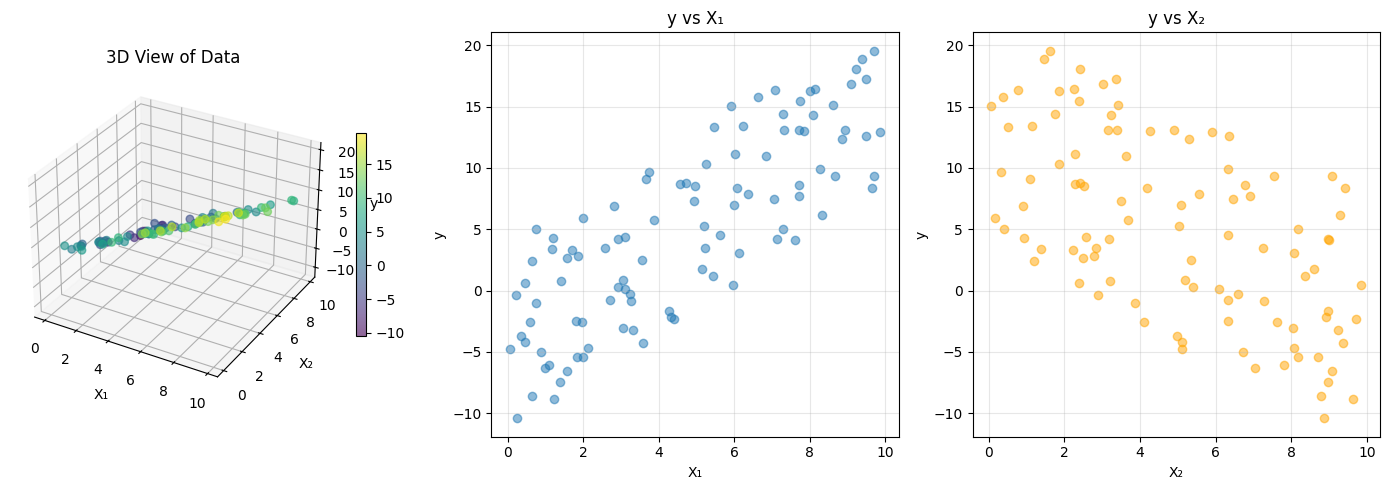

BATCH GRADIENT DESCENT
Final parameters: θ₀=2.3047, θ₁=2.0377, θ₂=-1.4045
True parameters:  θ₀=3.0000, θ₁=2.0000, θ₂=-1.5000
R² score: 0.994503
Final loss: 0.150232

MOMENTUM (γ=0.7)
Converged at iteration 874
Final parameters: θ₀=2.9194, θ₁=1.9859, θ₂=-1.4608
R² score: 0.995668
Final loss: 0.118307

NAG (γ=0.7)
Converged at iteration 876
Final parameters: θ₀=2.9192, θ₁=1.9860, θ₂=-1.4607
R² score: 0.995668
Final loss: 0.118308


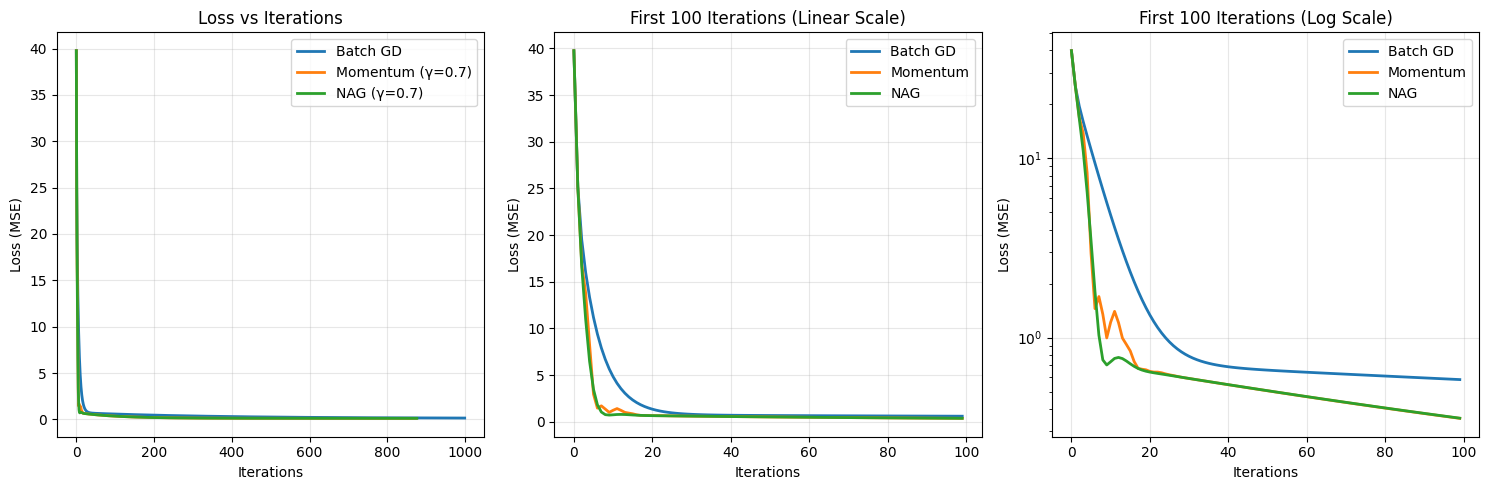

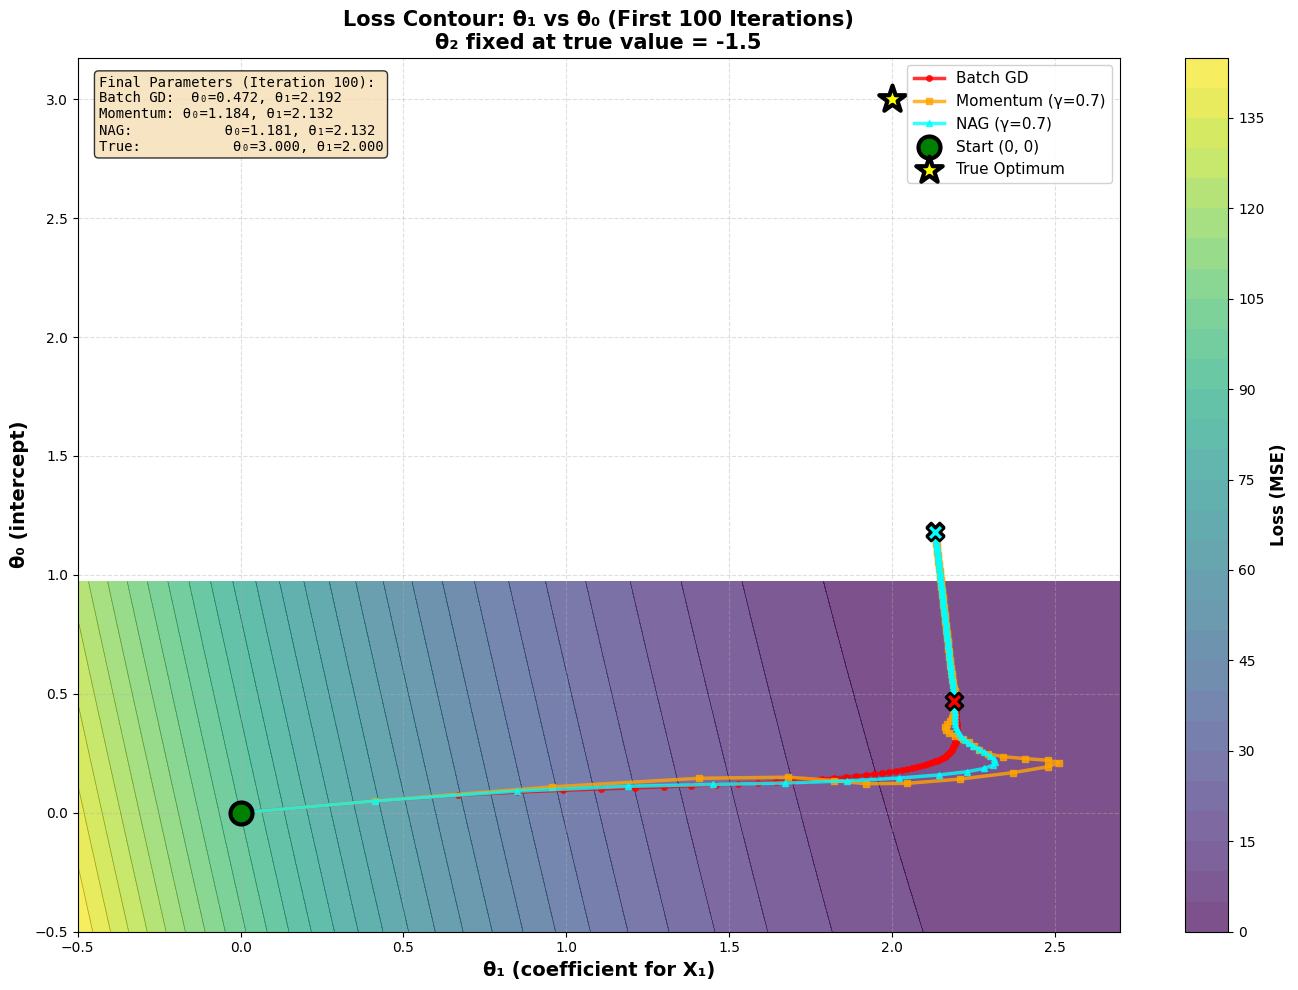

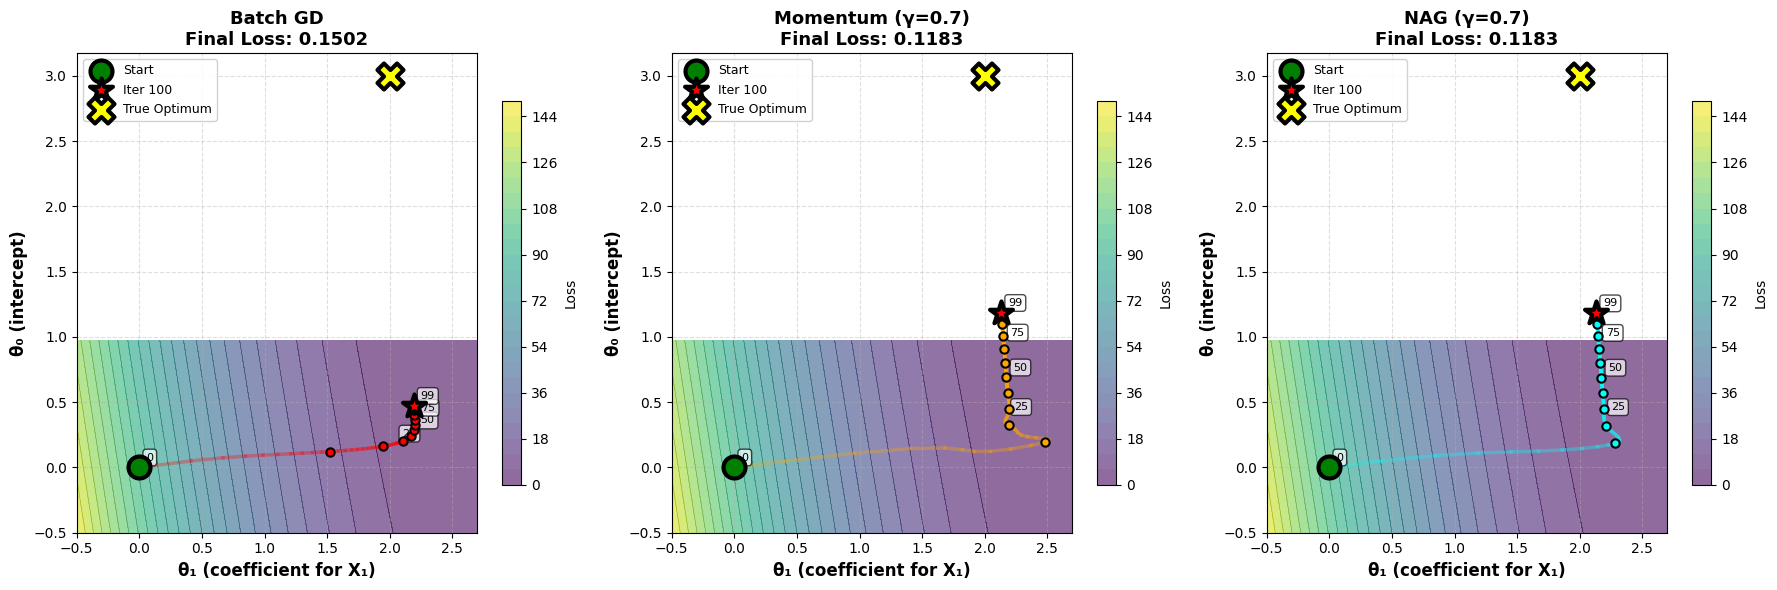

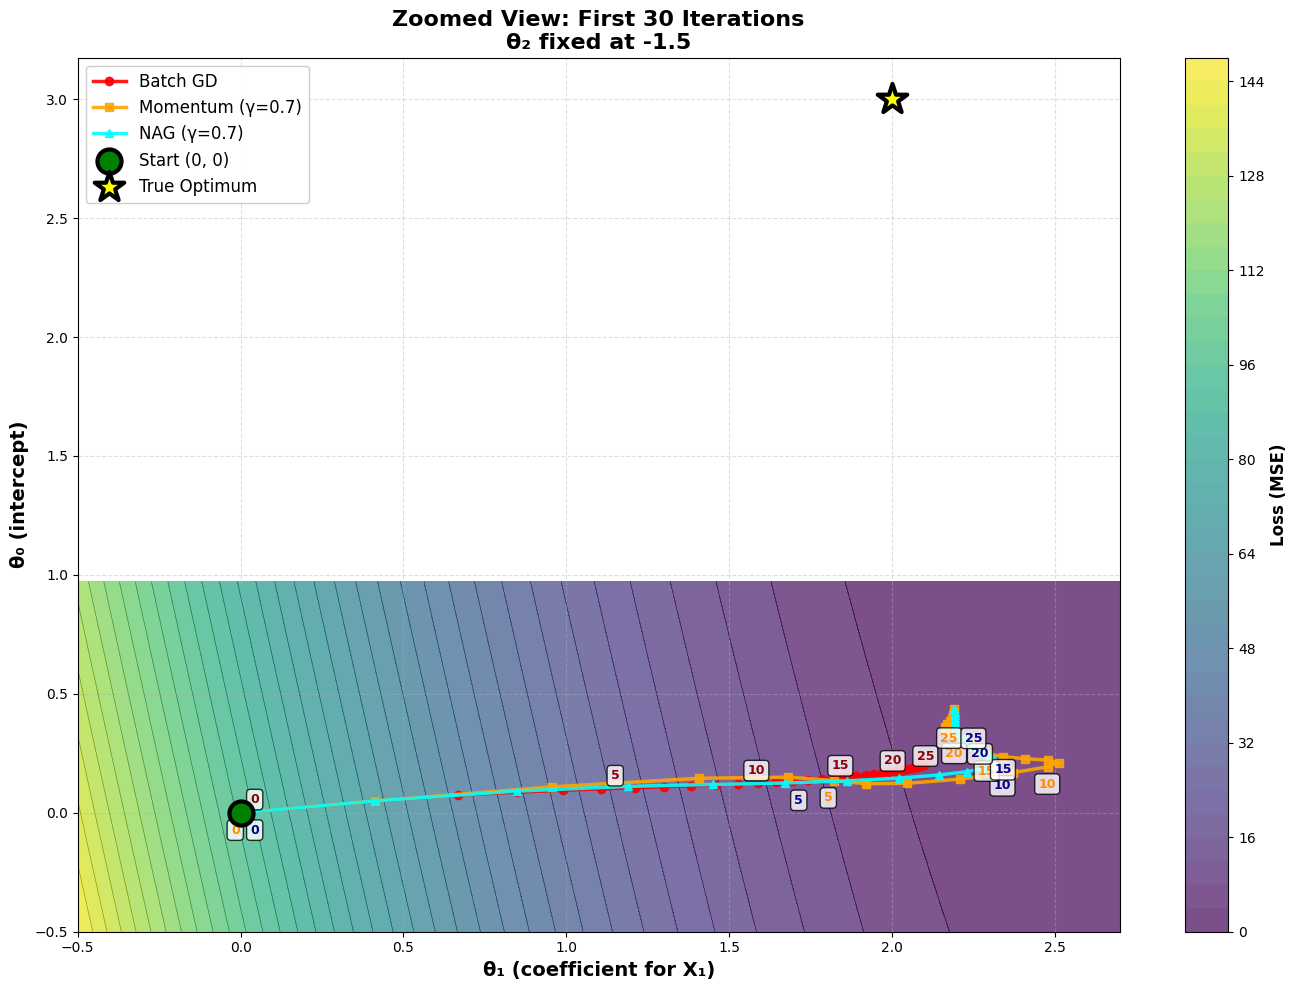

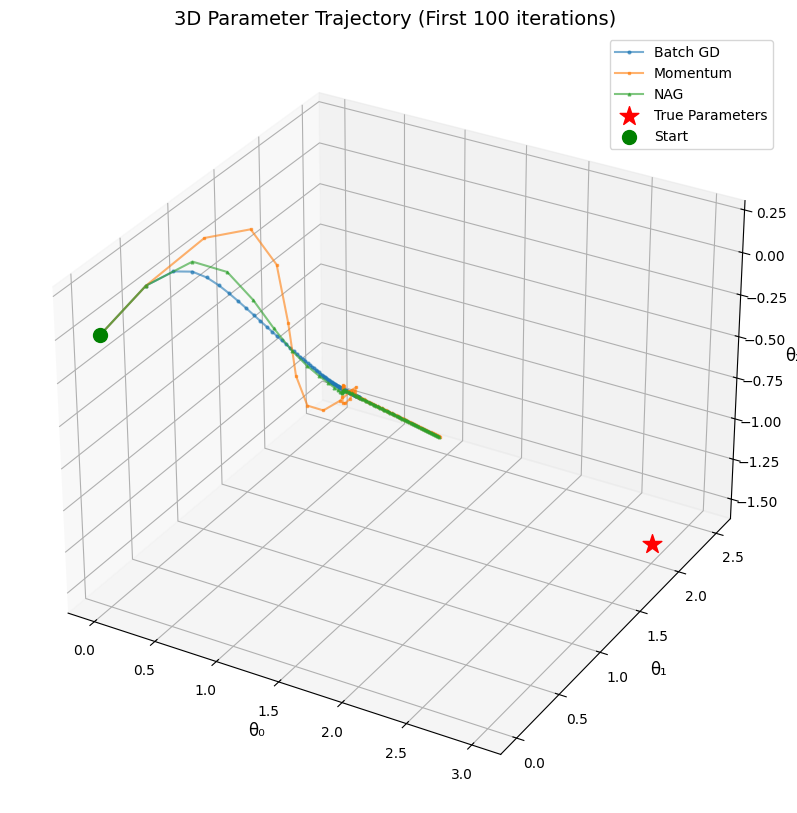

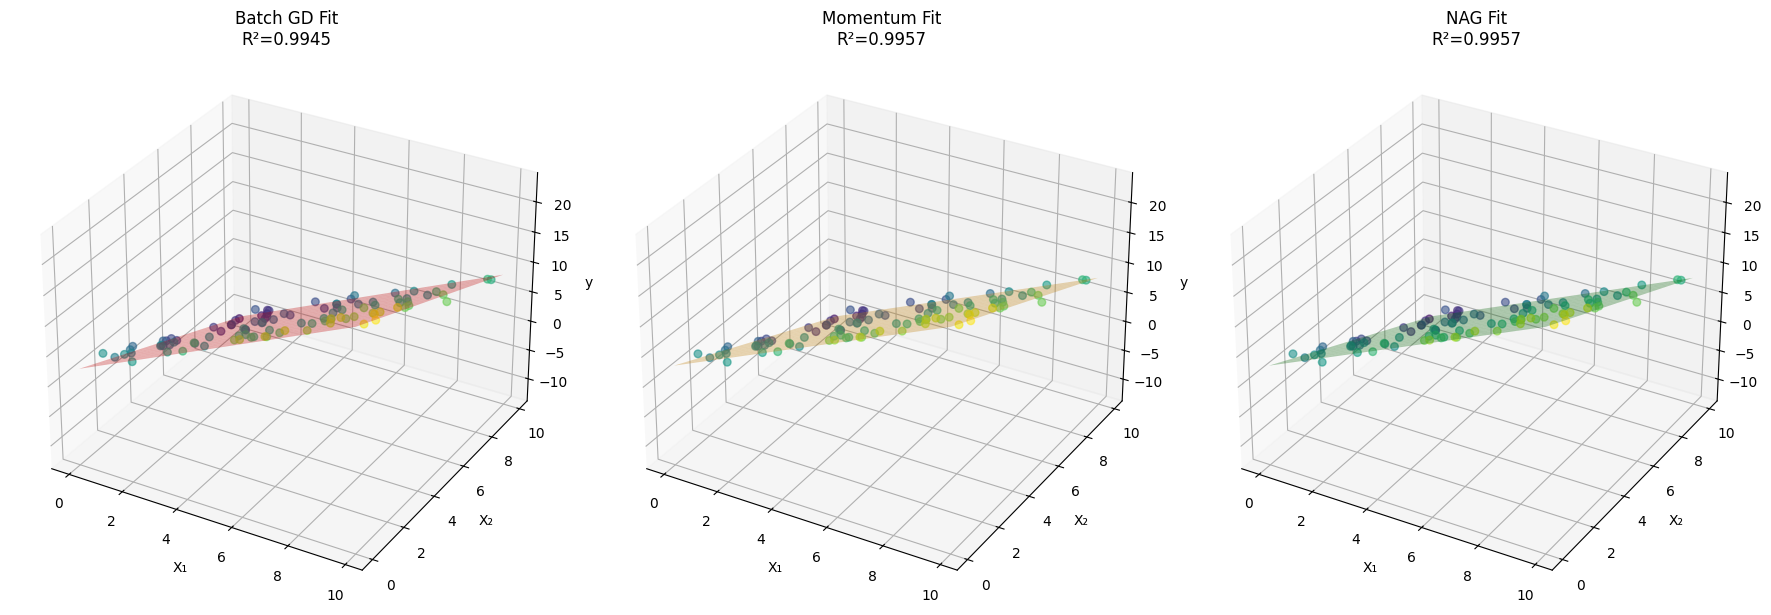


SUMMARY
True parameters:     θ₀=3.0000, θ₁=2.0000, θ₂=-1.5000
Batch GD learned:    θ₀=2.3047, θ₁=2.0377, θ₂=-1.4045
Momentum learned:    θ₀=2.9194, θ₁=1.9859, θ₂=-1.4608
NAG learned:         θ₀=2.9192, θ₁=1.9860, θ₂=-1.4607


In [73]:
# %% [markdown]
# # 2D Linear Regression Example
# Multiple Variable Linear Regression: y = θ₀ + θ₁*x₁ + θ₂*x₂

# %%
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import r2_score

# %% [markdown]
# ## Generate 2D Dataset
# We'll create data following: y = 3 + 2*x₁ - 1.5*x₂ + noise

# %%
np.random.seed(42)

# Generate 100 data points
n_samples = 100

# Two features
X1 = np.random.uniform(0, 10, n_samples)
X2 = np.random.uniform(0, 10, n_samples)

# Stack features into matrix (n_samples, 2)
X = np.column_stack([X1, X2])

# True parameters
theta_0_true = 3.0
theta_1_true = 2.0
theta_2_true = -1.5

# Generate target with small noise
noise = np.random.normal(0, 0.5, n_samples)
y = theta_0_true + theta_1_true * X1 + theta_2_true * X2 + noise

print(f"Data shape: X={X.shape}, y={y.shape}")
print(f"True parameters: θ₀={theta_0_true}, θ₁={theta_1_true}, θ₂={theta_2_true}")

# %% [markdown]
# ## Visualize the Data

# %%
fig = plt.figure(figsize=(14, 5))

# 3D scatter plot
ax1 = fig.add_subplot(131, projection='3d')
scatter = ax1.scatter(X1, X2, y, c=y, cmap='viridis', s=30, alpha=0.6)
ax1.set_xlabel('X₁')
ax1.set_ylabel('X₂')
ax1.set_zlabel('y')
ax1.set_title('3D View of Data')
plt.colorbar(scatter, ax=ax1, shrink=0.5)

# X1 vs y
ax2 = fig.add_subplot(132)
ax2.scatter(X1, y, alpha=0.5)
ax2.set_xlabel('X₁')
ax2.set_ylabel('y')
ax2.set_title('y vs X₁')
ax2.grid(True, alpha=0.3)

# X2 vs y
ax3 = fig.add_subplot(133)
ax3.scatter(X2, y, alpha=0.5, color='orange')
ax3.set_xlabel('X₂')
ax3.set_ylabel('y')
ax3.set_title('y vs X₂')
ax3.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# %% [markdown]
# ## Batch Gradient Descent (2D)

# %%
def batch_gd_2d(X, y, LR=0.01, TOL=1e-6, MAX_ITER=1000):
    """
    Batch Gradient Descent for 2 features
    X: (n_samples, 2) feature matrix
    y: (n_samples,) target vector
    """
    m = len(y)
    
    # Initialize parameters
    theta_0 = 0.0
    theta_1 = 0.0
    theta_2 = 0.0
    
    loss_history = []
    theta0_history = [theta_0]
    theta1_history = [theta_1]
    theta2_history = [theta_2]
    
    for iter in range(MAX_ITER):
        # Predict: h(x) = θ₀ + θ₁*x₁ + θ₂*x₂
        h = theta_0 + theta_1 * X[:, 0] + theta_2 * X[:, 1]
        
        # Loss (MSE)
        error = h - y
        j = np.sum(error**2) / (2 * m)
        loss_history.append(j)
        
        # Gradients
        grad_theta_0 = (1/m) * np.sum(error)
        grad_theta_1 = (1/m) * np.sum(error * X[:, 0])
        grad_theta_2 = (1/m) * np.sum(error * X[:, 1])
        
        # Update parameters
        theta_0 -= LR * grad_theta_0
        theta_1 -= LR * grad_theta_1
        theta_2 -= LR * grad_theta_2
        
        # Save history
        theta0_history.append(theta_0)
        theta1_history.append(theta_1)
        theta2_history.append(theta_2)
        
        # Convergence check
        if iter > 0 and np.abs(loss_history[-1] - loss_history[-2]) < TOL:
            print(f'Converged at iteration {iter}')
            break
    
    return (theta_0, theta_1, theta_2, loss_history, 
            theta0_history, theta1_history, theta2_history)

# %% [markdown]
# ## Momentum Gradient Descent (2D)

# %%
def momentum_gd_2d(X, y, LR=0.01, GAMMA=0.9, TOL=1e-6, MAX_ITER=1000):
    """Momentum-based Gradient Descent for 2 features"""
    m = len(y)
    
    # Initialize parameters
    theta_0 = 0.0
    theta_1 = 0.0
    theta_2 = 0.0
    
    # Initialize velocities
    v_0 = 0.0
    v_1 = 0.0
    v_2 = 0.0
    
    loss_history = []
    theta0_history = [theta_0]
    theta1_history = [theta_1]
    theta2_history = [theta_2]
    
    for iter in range(MAX_ITER):
        # Predict
        h = theta_0 + theta_1 * X[:, 0] + theta_2 * X[:, 1]
        
        # Loss
        error = h - y
        j = np.sum(error**2) / (2 * m)
        loss_history.append(j)
        
        # Gradients
        grad_theta_0 = (1/m) * np.sum(error)
        grad_theta_1 = (1/m) * np.sum(error * X[:, 0])
        grad_theta_2 = (1/m) * np.sum(error * X[:, 1])
        
        # Update velocities
        v_0 = GAMMA * v_0 + LR * grad_theta_0
        v_1 = GAMMA * v_1 + LR * grad_theta_1
        v_2 = GAMMA * v_2 + LR * grad_theta_2
        
        # Update parameters
        theta_0 -= v_0
        theta_1 -= v_1
        theta_2 -= v_2
        
        # Save history
        theta0_history.append(theta_0)
        theta1_history.append(theta_1)
        theta2_history.append(theta_2)
        
        # Convergence check
        if iter > 0 and np.abs(loss_history[-1] - loss_history[-2]) < TOL:
            print(f'Converged at iteration {iter}')
            break
    
    return (theta_0, theta_1, theta_2, loss_history, 
            theta0_history, theta1_history, theta2_history)

# %% [markdown]
# ## NAG (Nesterov Accelerated Gradient) - 2D

# %%
def nag_2d(X, y, LR=0.01, GAMMA=0.9, TOL=1e-6, MAX_ITER=1000):
    """Nesterov Accelerated Gradient for 2 features"""
    m = len(y)
    
    # Initialize parameters
    theta_0 = 0.0
    theta_1 = 0.0
    theta_2 = 0.0
    
    # Initialize velocities
    v_0 = 0.0
    v_1 = 0.0
    v_2 = 0.0
    
    loss_history = []
    theta0_history = [theta_0]
    theta1_history = [theta_1]
    theta2_history = [theta_2]
    
    for iter in range(MAX_ITER):
        # Look-ahead parameters
        theta_0_temp = theta_0 - GAMMA * v_0
        theta_1_temp = theta_1 - GAMMA * v_1
        theta_2_temp = theta_2 - GAMMA * v_2
        
        # Predict at look-ahead position
        h_temp = theta_0_temp + theta_1_temp * X[:, 0] + theta_2_temp * X[:, 1]
        
        # Loss at current position (for tracking)
        h_current = theta_0 + theta_1 * X[:, 0] + theta_2 * X[:, 1]
        error_current = h_current - y
        j = np.sum(error_current**2) / (2 * m)
        loss_history.append(j)
        
        # Gradients at look-ahead position
        error_temp = h_temp - y
        grad_theta_0 = (1/m) * np.sum(error_temp)
        grad_theta_1 = (1/m) * np.sum(error_temp * X[:, 0])
        grad_theta_2 = (1/m) * np.sum(error_temp * X[:, 1])
        
        # Update velocities
        v_0 = GAMMA * v_0 + LR * grad_theta_0
        v_1 = GAMMA * v_1 + LR * grad_theta_1
        v_2 = GAMMA * v_2 + LR * grad_theta_2
        
        # Update parameters
        theta_0 -= v_0
        theta_1 -= v_1
        theta_2 -= v_2
        
        # Save history
        theta0_history.append(theta_0)
        theta1_history.append(theta_1)
        theta2_history.append(theta_2)
        
        # Convergence check
        if iter > 0 and np.abs(loss_history[-1] - loss_history[-2]) < TOL:
            print(f'Converged at iteration {iter}')
            break
    
    return (theta_0, theta_1, theta_2, loss_history, 
            theta0_history, theta1_history, theta2_history)

# %% [markdown]
# ## Train All Models

# %%
print("=" * 60)
print("BATCH GRADIENT DESCENT")
print("=" * 60)
theta0_gd, theta1_gd, theta2_gd, loss_gd, th0_hist_gd, th1_hist_gd, th2_hist_gd = \
    batch_gd_2d(X, y, LR=0.01, MAX_ITER=1000)

y_pred_gd = theta0_gd + theta1_gd * X[:, 0] + theta2_gd * X[:, 1]
r2_gd = r2_score(y, y_pred_gd)

print(f"Final parameters: θ₀={theta0_gd:.4f}, θ₁={theta1_gd:.4f}, θ₂={theta2_gd:.4f}")
print(f"True parameters:  θ₀={theta_0_true:.4f}, θ₁={theta_1_true:.4f}, θ₂={theta_2_true:.4f}")
print(f"R² score: {r2_gd:.6f}")
print(f"Final loss: {loss_gd[-1]:.6f}\n")

print("=" * 60)
print("MOMENTUM (γ=0.7)")
print("=" * 60)
theta0_m, theta1_m, theta2_m, loss_m, th0_hist_m, th1_hist_m, th2_hist_m = \
    momentum_gd_2d(X, y, LR=0.01, GAMMA=0.7, MAX_ITER=1000)

y_pred_m = theta0_m + theta1_m * X[:, 0] + theta2_m * X[:, 1]
r2_m = r2_score(y, y_pred_m)

print(f"Final parameters: θ₀={theta0_m:.4f}, θ₁={theta1_m:.4f}, θ₂={theta2_m:.4f}")
print(f"R² score: {r2_m:.6f}")
print(f"Final loss: {loss_m[-1]:.6f}\n")

print("=" * 60)
print("NAG (γ=0.7)")
print("=" * 60)
theta0_n, theta1_n, theta2_n, loss_n, th0_hist_n, th1_hist_n, th2_hist_n = \
    nag_2d(X, y, LR=0.01, GAMMA=0.7, MAX_ITER=1000)

y_pred_n = theta0_n + theta1_n * X[:, 0] + theta2_n * X[:, 1]
r2_n = r2_score(y, y_pred_n)

print(f"Final parameters: θ₀={theta0_n:.4f}, θ₁={theta1_n:.4f}, θ₂={theta2_n:.4f}")
print(f"R² score: {r2_n:.6f}")
print(f"Final loss: {loss_n[-1]:.6f}")

# %% [markdown]
# ## Visualization: Loss Curves

# %%
plt.figure(figsize=(15, 5))

# Loss vs iterations
plt.subplot(1, 3, 1)
plt.plot(loss_gd, label='Batch GD', linewidth=2)
plt.plot(loss_m, label='Momentum (γ=0.7)', linewidth=2)
plt.plot(loss_n, label='NAG (γ=0.7)', linewidth=2)
plt.xlabel('Iterations')
plt.ylabel('Loss (MSE)')
plt.title('Loss vs Iterations')
plt.legend()
plt.grid(True, alpha=0.3)

# First 100 iterations - linear scale
plt.subplot(1, 3, 2)
plt.plot(loss_gd[:100], label='Batch GD', linewidth=2)
plt.plot(loss_m[:100], label='Momentum', linewidth=2)
plt.plot(loss_n[:100], label='NAG', linewidth=2)
plt.xlabel('Iterations')
plt.ylabel('Loss (MSE)')
plt.title('First 100 Iterations (Linear Scale)')
plt.legend()
plt.grid(True, alpha=0.3)

# Log scale
plt.subplot(1, 3, 3)
plt.plot(loss_gd[:100], label='Batch GD', linewidth=2)
plt.plot(loss_m[:100], label='Momentum', linewidth=2)
plt.plot(loss_n[:100], label='NAG', linewidth=2)
plt.xlabel('Iterations')
plt.ylabel('Loss (MSE)')
plt.title('First 100 Iterations (Log Scale)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.yscale('log')

plt.tight_layout()
plt.show()

# %% [markdown]
# ## Contour Plots: Loss Surface with Trajectories (θ₁ vs θ₀)

# %%
def compute_loss_grid_theta1_theta0(X, y, theta1_range, theta0_range, theta2_fixed):
    """Compute loss on a grid for contour plotting - θ₁ vs θ₀"""
    m = len(y)
    T1, T0 = np.meshgrid(theta1_range, theta0_range)
    Z = np.zeros_like(T1)
    
    for i in range(len(theta1_range)):
        for j in range(len(theta0_range)):
            h = T0[j, i] + T1[j, i] * X[:, 0] + theta2_fixed * X[:, 1]
            Z[j, i] = np.sum((h - y)**2) / (2 * m)
    
    return T1, T0, Z

# Create grid for θ₁-θ₀ plane (fix θ₂ at true value)
theta1_range = np.linspace(min(th1_hist_gd[:100]) - 0.5, 
                           max(th1_hist_gd[:100]) + 0.5, 100)
theta0_range = np.linspace(min(th0_hist_gd[:100]) - 0.5, 
                           max(th0_hist_gd[:100]) + 0.5, 100)
T1, T0, Z = compute_loss_grid_theta1_theta0(X, y, theta1_range, theta0_range, theta_2_true)

# Plot main comparison contour - θ₁ vs θ₀
fig = plt.figure(figsize=(14, 10))

ax = fig.add_subplot(111)
# Filled contour for better visualization
contourf = ax.contourf(T1, T0, Z, levels=30, cmap='viridis', alpha=0.7)
# Line contours for clearer level lines
contour = ax.contour(T1, T0, Z, levels=30, colors='black', alpha=0.3, linewidths=0.5)

# Plot trajectories
ax.plot(th1_hist_gd[:100], th0_hist_gd[:100], 'o-', 
        markersize=4, linewidth=2.5, label='Batch GD', color='red', alpha=0.8)
ax.plot(th1_hist_m[:100], th0_hist_m[:100], 's-', 
        markersize=4, linewidth=2.5, label='Momentum (γ=0.7)', color='orange', alpha=0.8)
ax.plot(th1_hist_n[:100], th0_hist_n[:100], '^-', 
        markersize=4, linewidth=2.5, label='NAG (γ=0.7)', color='cyan', alpha=0.8)

# Mark important points
ax.scatter([0], [0], color='green', s=250, 
          marker='o', edgecolors='black', linewidths=3, label='Start (0, 0)', zorder=5)
ax.scatter([theta_1_true], [theta_0_true], color='yellow', s=400, 
          marker='*', edgecolors='black', linewidths=3, label='True Optimum', zorder=5)

# Mark end points for each algorithm
ax.scatter([th1_hist_gd[99]], [th0_hist_gd[99]], color='red', s=150, 
          marker='X', edgecolors='black', linewidths=2, zorder=5)
ax.scatter([th1_hist_m[99]], [th0_hist_m[99]], color='orange', s=150, 
          marker='X', edgecolors='black', linewidths=2, zorder=5)
ax.scatter([th1_hist_n[99]], [th0_hist_n[99]], color='cyan', s=150, 
          marker='X', edgecolors='black', linewidths=2, zorder=5)

ax.set_xlabel('θ₁ (coefficient for X₁)', fontsize=14, fontweight='bold')
ax.set_ylabel('θ₀ (intercept)', fontsize=14, fontweight='bold')
ax.set_title(f'Loss Contour: θ₁ vs θ₀ (First 100 Iterations)\nθ₂ fixed at true value = {theta_2_true:.1f}', 
            fontsize=15, fontweight='bold')
ax.legend(fontsize=11, loc='best', framealpha=0.9)
ax.grid(True, alpha=0.4, linestyle='--')

# Add colorbar
cbar = plt.colorbar(contourf, ax=ax, label='Loss (MSE)')
cbar.set_label('Loss (MSE)', fontsize=12, fontweight='bold')

# Add text annotations for final values
textstr = f'Final Parameters (Iteration 100):\n'
textstr += f'Batch GD:  θ₀={th0_hist_gd[99]:.3f}, θ₁={th1_hist_gd[99]:.3f}\n'
textstr += f'Momentum: θ₀={th0_hist_m[99]:.3f}, θ₁={th1_hist_m[99]:.3f}\n'
textstr += f'NAG:           θ₀={th0_hist_n[99]:.3f}, θ₁={th1_hist_n[99]:.3f}\n'
textstr += f'True:           θ₀={theta_0_true:.3f}, θ₁={theta_1_true:.3f}'

props = dict(boxstyle='round', facecolor='wheat', alpha=0.8)
ax.text(0.02, 0.98, textstr, transform=ax.transAxes, fontsize=10,
        verticalalignment='top', bbox=props, family='monospace')

plt.tight_layout()
plt.show()

# %% [markdown]
# ## Detailed Individual Contour Plots - θ₁ vs θ₀

# %%
fig = plt.figure(figsize=(18, 6))

methods = [
    ('Batch GD', th0_hist_gd, th1_hist_gd, 'red', loss_gd),
    ('Momentum (γ=0.7)', th0_hist_m, th1_hist_m, 'orange', loss_m),
    ('NAG (γ=0.7)', th0_hist_n, th1_hist_n, 'cyan', loss_n)
]

for idx, (name, th0, th1, color, loss) in enumerate(methods):
    ax = fig.add_subplot(1, 3, idx + 1)
    
    # Filled contour
    contourf = ax.contourf(T1, T0, Z, levels=25, cmap='viridis', alpha=0.6)
    # Line contours
    ax.contour(T1, T0, Z, levels=25, colors='black', alpha=0.2, linewidths=0.5)
    
    # Plot trajectory with color gradient based on iteration
    n_points = 100
    for i in range(n_points - 1):
        alpha_val = 0.3 + (i / n_points) * 0.7  # Fade from 0.3 to 1.0
        ax.plot(th1[i:i+2], th0[i:i+2], '-', 
               linewidth=2.5, color=color, alpha=alpha_val)
    
    # Plot markers at intervals
    interval = 10
    ax.plot(th1[:100:interval], th0[:100:interval], 'o', 
           markersize=6, color=color, markeredgecolor='black', 
           markeredgewidth=1.5, zorder=4)
    
    # Mark special points
    ax.scatter([th1[0]], [th0[0]], color='green', s=250, 
              marker='o', edgecolors='black', linewidths=3, 
              label='Start', zorder=5)
    ax.scatter([th1[99]], [th0[99]], color='red', s=300, 
              marker='*', edgecolors='black', linewidths=3, 
              label=f'Iter 100', zorder=5)
    ax.scatter([theta_1_true], [theta_0_true], color='yellow', s=350, 
              marker='X', edgecolors='black', linewidths=3, 
              label='True Optimum', zorder=5)
    
    ax.set_xlabel('θ₁ (coefficient for X₁)', fontsize=12, fontweight='bold')
    ax.set_ylabel('θ₀ (intercept)', fontsize=12, fontweight='bold')
    ax.set_title(f'{name}\nFinal Loss: {loss[-1]:.4f}', fontsize=13, fontweight='bold')
    ax.legend(fontsize=9, loc='best', framealpha=0.9)
    ax.grid(True, alpha=0.4, linestyle='--')
    
    # Add colorbar
    plt.colorbar(contourf, ax=ax, label='Loss', shrink=0.8)
    
    # Add iteration markers
    for i in [0, 25, 50, 75, 99]:
        ax.annotate(f'{i}', 
                   xy=(th1[i], th0[i]), 
                   xytext=(5, 5), 
                   textcoords='offset points',
                   fontsize=8,
                   bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.7))

plt.tight_layout()
plt.show()

# %% [markdown]
# ## Zoomed-in View: First 30 Iterations

# %%
fig = plt.figure(figsize=(14, 10))

ax = fig.add_subplot(111)

# Filled contour
contourf = ax.contourf(T1, T0, Z, levels=35, cmap='viridis', alpha=0.7)
# Line contours
ax.contour(T1, T0, Z, levels=35, colors='black', alpha=0.3, linewidths=0.5)

# Plot trajectories - first 30 iterations only
n_iter = 30
ax.plot(th1_hist_gd[:n_iter], th0_hist_gd[:n_iter], 'o-', 
        markersize=6, linewidth=2.5, label='Batch GD', color='red', alpha=0.9)
ax.plot(th1_hist_m[:n_iter], th0_hist_m[:n_iter], 's-', 
        markersize=6, linewidth=2.5, label='Momentum (γ=0.7)', color='orange', alpha=0.9)
ax.plot(th1_hist_n[:n_iter], th0_hist_n[:n_iter], '^-', 
        markersize=6, linewidth=2.5, label='NAG (γ=0.7)', color='cyan', alpha=0.9)

# Mark points every 5 iterations
for i in range(0, n_iter, 5):
    # Batch GD
    ax.annotate(f'{i}', xy=(th1_hist_gd[i], th0_hist_gd[i]), 
               xytext=(7, 7), textcoords='offset points',
               fontsize=9, color='darkred', fontweight='bold',
               bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8))
    # Momentum
    ax.annotate(f'{i}', xy=(th1_hist_m[i], th0_hist_m[i]), 
               xytext=(-7, -15), textcoords='offset points',
               fontsize=9, color='darkorange', fontweight='bold',
               bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8))
    # NAG
    ax.annotate(f'{i}', xy=(th1_hist_n[i], th0_hist_n[i]), 
               xytext=(7, -15), textcoords='offset points',
               fontsize=9, color='darkblue', fontweight='bold',
               bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8))

# Mark important points
ax.scatter([0], [0], color='green', s=300, 
          marker='o', edgecolors='black', linewidths=3, 
          label='Start (0, 0)', zorder=5)
ax.scatter([theta_1_true], [theta_0_true], color='yellow', s=500, 
          marker='*', edgecolors='black', linewidths=3, 
          label='True Optimum', zorder=5)

ax.set_xlabel('θ₁ (coefficient for X₁)', fontsize=14, fontweight='bold')
ax.set_ylabel('θ₀ (intercept)', fontsize=14, fontweight='bold')
ax.set_title(f'Zoomed View: First {n_iter} Iterations\nθ₂ fixed at {theta_2_true:.1f}', 
            fontsize=16, fontweight='bold')
ax.legend(fontsize=12, loc='best', framealpha=0.95)
ax.grid(True, alpha=0.4, linestyle='--')

# Add colorbar
cbar = plt.colorbar(contourf, ax=ax, label='Loss (MSE)')
cbar.set_label('Loss (MSE)', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

# %% [markdown]
# ## 3D Trajectory in Parameter Space

# %%
fig = plt.figure(figsize=(12, 10))

ax = fig.add_subplot(111, projection='3d')

# Plot trajectories
ax.plot(th0_hist_gd[:100], th1_hist_gd[:100], th2_hist_gd[:100], 
        'o-', markersize=2, linewidth=1.5, label='Batch GD', alpha=0.6)
ax.plot(th0_hist_m[:100], th1_hist_m[:100], th2_hist_m[:100], 
        's-', markersize=2, linewidth=1.5, label='Momentum', alpha=0.6)
ax.plot(th0_hist_n[:100], th1_hist_n[:100], th2_hist_n[:100], 
        '^-', markersize=2, linewidth=1.5, label='NAG', alpha=0.6)

# Mark true parameters
ax.scatter([theta_0_true], [theta_1_true], [theta_2_true], 
           color='red', s=200, marker='*', label='True Parameters', zorder=5)

# Mark starting point
ax.scatter([0], [0], [0], color='green', s=100, marker='o', 
           label='Start', zorder=5)

ax.set_xlabel('θ₀', fontsize=12)
ax.set_ylabel('θ₁', fontsize=12)
ax.set_zlabel('θ₂', fontsize=12)
ax.set_title('3D Parameter Trajectory (First 100 iterations)', fontsize=14)
ax.legend()
ax.grid(True, alpha=0.3)

plt.show()

# %% [markdown]
# ## Visualize Fitted Plane

# %%
fig = plt.figure(figsize=(18, 6))

# Create meshgrid for plane
x1_range = np.linspace(X1.min(), X1.max(), 20)
x2_range = np.linspace(X2.min(), X2.max(), 20)
X1_mesh, X2_mesh = np.meshgrid(x1_range, x2_range)

# Batch GD
ax1 = fig.add_subplot(131, projection='3d')
Y_mesh_gd = theta0_gd + theta1_gd * X1_mesh + theta2_gd * X2_mesh
ax1.scatter(X1, X2, y, c=y, cmap='viridis', s=30, alpha=0.6)
ax1.plot_surface(X1_mesh, X2_mesh, Y_mesh_gd, alpha=0.3, color='red')
ax1.set_xlabel('X₁')
ax1.set_ylabel('X₂')
ax1.set_zlabel('y')
ax1.set_title(f'Batch GD Fit\nR²={r2_gd:.4f}')

# Momentum
ax2 = fig.add_subplot(132, projection='3d')
Y_mesh_m = theta0_m + theta1_m * X1_mesh + theta2_m * X2_mesh
ax2.scatter(X1, X2, y, c=y, cmap='viridis', s=30, alpha=0.6)
ax2.plot_surface(X1_mesh, X2_mesh, Y_mesh_m, alpha=0.3, color='orange')
ax2.set_xlabel('X₁')
ax2.set_ylabel('X₂')
ax2.set_zlabel('y')
ax2.set_title(f'Momentum Fit\nR²={r2_m:.4f}')

# NAG
ax3 = fig.add_subplot(133, projection='3d')
Y_mesh_n = theta0_n + theta1_n * X1_mesh + theta2_n * X2_mesh
ax3.scatter(X1, X2, y, c=y, cmap='viridis', s=30, alpha=0.6)
ax3.plot_surface(X1_mesh, X2_mesh, Y_mesh_n, alpha=0.3, color='green')
ax3.set_xlabel('X₁')
ax3.set_ylabel('X₂')
ax3.set_zlabel('y')
ax3.set_title(f'NAG Fit\nR²={r2_n:.4f}')

plt.tight_layout()
plt.show()

print("\n" + "=" * 60)
print("SUMMARY")
print("=" * 60)
print(f"True parameters:     θ₀={theta_0_true:.4f}, θ₁={theta_1_true:.4f}, θ₂={theta_2_true:.4f}")
print(f"Batch GD learned:    θ₀={theta0_gd:.4f}, θ₁={theta1_gd:.4f}, θ₂={theta2_gd:.4f}")
print(f"Momentum learned:    θ₀={theta0_m:.4f}, θ₁={theta1_m:.4f}, θ₂={theta2_m:.4f}")
print(f"NAG learned:         θ₀={theta0_n:.4f}, θ₁={theta1_n:.4f}, θ₂={theta2_n:.4f}")
print("=" * 60)